# Exploratory Data Analysis on Anime Dataset

Information gathered from [My Anime List](https://myanimelist.net/)

Usually when we think of Data Science, Machine Learning or Artificial Intelligence, we think of the models and the wonderful applications, but the first step is usually to explore and clean the data.

The topics covered in the post is as follows:

- Data Preparation, Cleaning and Descriptive Analysis
- Data and Visual Analysis
- References

# Data Preparation, Cleaning and Descriptive Analysis

## Importing libraries and checking the raw information

In [2]:
#Library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
from collections import Counter
from utils import utils
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
#import missingno as msno

In [5]:
#Preparing folder variables
#os.chdir(os.path.dirname(sys.path[0])) # This command makes the notebook the main path and can work in cascade.
#main_folder = sys.path[0]
#data_folder = (main_folder + "\data")
#print(data_folder)
#df = pd.read_csv(data_folder,"cleaned.csv")

First we need to read the csv file that contains the data

In [6]:
df = pd.read_csv("C:/Users/Christiandda/Desktop/dataset/anime_2022_12_02_00_24_58.csv",sep=";") # reading file
df_copy = df.copy() # making  copy
df_copy.sample(5) # printing a sample

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
2582,https://cdn.myanimelist.net/images/anime/1099/...,Geragera Boes Monogatari,げらげらブース物語,TV,Other,['Kids'],52,24 min per ep,G - All Ages,7.00,831.0,3995.0,spring,['Comedy'],[],1987.0,['Telescreen'],"['TV Tokyo', 'Saban Entertainment']"
19391,https://cdn.myanimelist.net/images/anime/1940/...,Qingwa Wangzi: Wa Wa Tanxian Dui,青蛙王子之蛙蛙探险队,TV,Original,['Kids'],52,11 min per ep,PG - Children,NaN,NaN,15300.0,NaN,[],[],NaN,[],[]
561,https://cdn.myanimelist.net/images/anime/3/755...,Jinzou Ningen Kikaider The Animation,人造人間キカイダーTHE ANIMATION,TV,Unknown,['Shounen'],13,23 min per ep,PG-13 - Teens 13 or older,6.96,4239.0,4151.0,fall,"['Action', 'Drama', 'Sci-Fi']",['Mecha'],2000.0,['Radix'],"['Aniplex', 'SME Visual Works', 'Studio OX']"
319,https://cdn.myanimelist.net/images/anime/13/75...,Tsukuyomi: Moon Phase,月詠 −MOON PHASE−,TV,Manga,['Seinen'],25,24 min per ep,PG-13 - Teens 13 or older,6.95,29185.0,4202.0,fall,"['Comedy', 'Fantasy', 'Romance']",['Vampire'],2004.0,['Shaft'],[]
5416,https://cdn.myanimelist.net/images/anime/1734/...,Shinryaku! Ika Musume,侵略!イカ娘,TV,Manga,['Shounen'],12,24 min per ep,PG-13 - Teens 13 or older,7.42,85914.0,1988.0,fall,"['Comedy', 'Slice of Life']",[],2010.0,['Diomedéa'],"['TV Tokyo', 'Lantis', 'Pony Canyon', 'Studio ..."


Now lets count of non-null values and the format of the columns

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24105 entries, 0 to 24104
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cover           24105 non-null  object 
 1   English_Title   24105 non-null  object 
 2   Japanses_Title  23914 non-null  object 
 3   Type            24029 non-null  object 
 4   Source          24105 non-null  object 
 5   Audience        24105 non-null  object 
 6   N_Episodes      24105 non-null  int64  
 7   Duration        24105 non-null  object 
 8   Rating          23315 non-null  object 
 9   Score           14874 non-null  float64
 10  Scored_by       14874 non-null  float64
 11  Rank            21515 non-null  float64
 12  Season          5348 non-null   object 
 13  Genre           24105 non-null  object 
 14  Theme           24105 non-null  object 
 15  Released        22885 non-null  float64
 16  Studios         24105 non-null  object 
 17  Producers       24105 non-null 

Printing the number of null values per column

In [8]:
#Print number of null per column
df_copy.isna().sum()

Cover                 0
English_Title         0
Japanses_Title      191
Type                 76
Source                0
Audience              0
N_Episodes            0
Duration              0
Rating              790
Score              9231
Scored_by          9231
Rank               2590
Season            18757
Genre                 0
Theme                 0
Released           1220
Studios               0
Producers             0
dtype: int64

Let's see the total number of null values in the df

In [9]:
#Print number TOTAL of null values in the df
df_copy.isna().sum().sum()

42086

Checking the percenteage of null values from higher to lower

In [10]:
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Score             38.294960
Scored_by         38.294960
Rank              10.744659
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Studios            0.000000
Theme              0.000000
Genre              0.000000
Cover              0.000000
English_Title      0.000000
Duration           0.000000
N_Episodes         0.000000
Audience           0.000000
Source             0.000000
Producers          0.000000
dtype: float64

## Next esteps explanation 

So far now we can see that we can't be completely confident in these results as we can see in the dataframe that there are many columns with empty lists. First we will have to clean the data, compare it with the previous results to see the change and then we can proceed to analyze.

There are some columns that the information is storaged inside a list and we would like to display them by removing brackets and commas from the list. in this way we can later analyze it if needed.

Now we can fully see the work we need to do.
- We will remove the column Season due to the high number of missing values.

- In Audience, rating ,Genre, Theme, Studios and Producers we will proceed to change null values to Unknown, due to we do not have that information.

- About released, Scored_by, Score and Rank:
    - Released: We will find the missing values with interpolation

    - Scored_by: We will find the missing values with interpolation
    
    - Score: We will find the missing values with interpolation

    - Rank: once we have all the values in Scored_by and Score we will use linear regresion to predict the missing values.

- Cover ,English_Title and Japanses_Title are not needed, we can also remove this columns

- Audience column: In the case of Audience, it is basically the japanese way to classify the people that would watch the anime. From My Anime List a different way of classification (more international style) was created to be more understandable for non japanese. For this reason we are not going to use Audience and we are going to drop it. 

- Duration column. We are gonna standarize is converting the information into a numeric value representing minutes.

## Cleaning the columns with empty lists

In [11]:
non_numeric = ["Audience","Genre","Theme","Studios","Producers"]
for column in non_numeric:
    df_copy[column] = df_copy[column].apply(eval).str.join(',') #remove brackets and commas

df_copy.sample(5)

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
9798,https://cdn.myanimelist.net/images/anime/12/73...,Punch Line,パンチライン,TV,Original,,12,23 min per ep,PG-13 - Teens 13 or older,6.92,91063.0,4327.0,spring,"Comedy,Sci-Fi,Supernatural,Ecchi",Super Power,2015.0,MAPPA,"Aniplex,Dentsu,Fuji TV,MAGES.,Kyoraku Industri..."
20225,https://cdn.myanimelist.net/images/anime/1275/...,Bai Bian Bu Lu Ke 4th Season,百变布鲁可 第4季,TV,Original,Kids,20,11 min per ep,PG - Children,NaN,NaN,18577.0,NaN,Fantasy,,NaN,,
21173,https://cdn.myanimelist.net/images/anime/1951/...,Dahuoji Yu Gongzhu Qun,打火机与公主裙,ONA,Novel,,13,14 min per ep,PG-13 - Teens 13 or older,6.55,165.0,6209.0,NaN,"Drama,Romance",School,2021.0,2:10 AM Animation,
8520,https://cdn.myanimelist.net/images/anime/7/786...,Airy Me,Airy Me,Music,Music,,1,5 min,PG-13 - Teens 13 or older,6.31,2583.0,7593.0,NaN,"Avant Garde,Award Winning,Drama,Horror",Music,2013.0,,Tamabi
4803,https://cdn.myanimelist.net/images/anime/5/160...,Mikan-Seijin,ミカンせいじん,TV,Unknown,,26,22 sec per ep,G - All Ages,5.59,208.0,11064.0,NaN,Comedy,,1992.0,,


After doiung that, we can see that in the columns "Audience","Genre","Theme","Studios" and "Producers" there are many empty spaces. For the purpose of checking missing data, we will replace them with NaN. However, later we will replace them with "Unknown"

In [12]:
# Replacing empty space with NaN
list_not_num = ["Audience","Genre","Theme","Studios","Producers"]
df_copy[list_not_num] = df_copy[list_not_num].apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

Let's check again the percenteage of null values.

In [13]:
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Audience          60.912674
Producers         53.839452
Theme             46.081726
Studios           43.410081
Scored_by         38.294960
Score             38.294960
Genre             19.207633
Rank              10.744659
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Duration           0.000000
English_Title      0.000000
N_Episodes         0.000000
Source             0.000000
Cover              0.000000
dtype: float64

## About released, Scored_by, Score and Rank

It is time to deal with the cleaning of Score, Scored_by and Rank values

lets check the number of null values in each of those columns

In [14]:
list_num = ["Rank",'Score','Scored_by',"Released"]
for cat in list_num:
    null_num = df_copy[cat].isna().sum()
    number = df_copy[cat][df_copy[cat] == 0].count()
    print("In the column ndamed",cat,"there are:",number,"of zero values")
    print("In the column ndamed",cat,"there are:",null_num,"of null values")

In the column ndamed Rank there are: 0 of zero values
In the column ndamed Rank there are: 2590 of null values
In the column ndamed Score there are: 0 of zero values
In the column ndamed Score there are: 9231 of null values
In the column ndamed Scored_by there are: 0 of zero values
In the column ndamed Scored_by there are: 9231 of null values
In the column ndamed Released there are: 0 of zero values
In the column ndamed Released there are: 1220 of null values


First we replace teh NaN values to zeros and count how many of them we have. We have 2590 rows with zero values.

In [15]:
#Replacing nan with ZEROS in numerical columns
list_num = ["Rank"]
for cat in list_num:
    df_copy[list_num] = df_copy[list_num].fillna(0)

Now we proceed with the interpolation to replace the missing null values in Released, Score and Scored_by

In [16]:
df_copy['Released'] = df_copy['Released'].interpolate(method = "spline", order = 1,  limit_direction = "both", downcast = "infer")
df_copy['Score'] = df_copy['Score'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")
df_copy['Scored_by'] = df_copy['Scored_by'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")

Now let's launch the prediction function to replace the zero values in the rank column. We also check how many zero and null values we have now, we can see that we do not have now.

In [17]:
utils.predict(df_copy)

In [18]:
list_num = ["Rank",'Score','Scored_by',"Released"]
for cat in list_num:
    null_num = df_copy[cat].isna().sum()
    number = df_copy[cat][df_copy[cat] == 0].count()
    print("In the column ndamed",cat,"there are:",number,"of zero values")
    print("In the column ndamed",cat,"there are:",null_num,"of null values")

In the column ndamed Rank there are: 0 of zero values
In the column ndamed Rank there are: 0 of null values
In the column ndamed Score there are: 0 of zero values
In the column ndamed Score there are: 0 of null values
In the column ndamed Scored_by there are: 0 of zero values
In the column ndamed Scored_by there are: 0 of null values
In the column ndamed Released there are: 0 of zero values
In the column ndamed Released there are: 0 of null values


To finalize with Scored_by, Rank and Released columns, we will chenge the column type to integer.

In [19]:
df_copy[['Scored_by','Rank','Released']] = df_copy[['Scored_by','Rank','Released']].astype('int')

## Dealing with Audience and Rating columns

As mentioned before, Audience column is basically the japanese way to classify the people that would watch the anime. From My Anime List a different way of classification (more international style) was created to be more understandable for non japanese.

We can print both columns to see how they are classified:

In [20]:
df_copy['Audience'].str.split(',').explode().value_counts()

Kids       5785
Shounen    2035
Seinen      915
Shoujo      700
Josei       105
Name: Audience, dtype: int64

In [21]:
df_copy['Rating'].str.split(',').explode().value_counts()

PG-13 - Teens 13 or older         8192
G - All Ages                      7230
PG - Children                     3989
Rx - Hentai                       1455
R - 17+ (violence & profanity)    1376
R+ - Mild Nudity                  1073
Name: Rating, dtype: int64

In [22]:
df_copy.drop(["Audience"] , axis = 1 , inplace = True)

## Removing unncesary columns

So let's proceed dropping the unnecesary columns for this analysis

In [23]:
# Dorpping unncesseray columns
df_copy.drop(["Cover" ,"Japanses_Title","Season",] , axis = 1 , inplace = True)

## Change null values to Unknown

We should not forget to assign Unkowns to all the Nan in the CATEGORICAL VARIABLES columns

In [24]:
list_num = ["Type",'Rating','Genre',"Released",'Studios',"Producers","Theme"]
for cat in list_num:
    df_copy[cat] = df_copy[cat].fillna('Unknown')

## Standaricing duration column

To finalize, lets change the format in the duration column. Let's leave the columns just with the duration in minutes

In [25]:
utils.to_minutes(df_copy)

Now are going to convert the Unknown values to nand in order to be able to interpolate the missing information

In [26]:
df_copy['Duration'] = df_copy['Duration'].replace('Unknown', np.nan)
df_copy['Duration'] = df_copy['Duration'].interpolate(method = "spline", order = 1,  limit_direction = "both", downcast = "infer")

## Checking results after the cleaning process

Finally, lets check the result of this cleaning process. As result, we see no null values in the columns and everything looks clean.

In [27]:
print(((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False))
print(f"Total number of records: {len(df_copy)}")

English_Title    0.0
Type             0.0
Source           0.0
N_Episodes       0.0
Duration         0.0
Rating           0.0
Score            0.0
Scored_by        0.0
Rank             0.0
Genre            0.0
Theme            0.0
Released         0.0
Studios          0.0
Producers        0.0
dtype: float64
Total number of records: 24105


In [28]:
df_copy.sample(5) # printing a sample

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
3185,Yunyun☆Paradise,OVA,Light novel,1,25.0,Rx - Hentai,5.520000,756,14532,Hentai,Unknown,1995,AIC,Pink Pineapple
2425,Dorami-chan: Mini-Dora SOS!!!,Movie,Unknown,1,40.0,G - All Ages,6.480000,252,6643,Fantasy,Unknown,1989,Unknown,Shin-Ei Animation
631,Shadow Skill: Eigi,TV,Manga,26,25.0,PG-13 - Teens 13 or older,7.090000,4598,3592,"Adventure,Drama,Fantasy","Martial Arts,Super Power",1998,Studio Deen,Bandai Visual
9513,Kitsune to Budou,OVA,Unknown,1,11.0,G - All Ages,6.234286,-824421,21418,Drama,Unknown,1998,Unknown,Gakken
22361,Tata Tu Ran Xiang Dao,ONA,Unknown,12,3.0,G - All Ages,6.627353,1569,16548,Comedy,Anthropomorphic,2020,Unknown,Unknown


There are 18 columns and 24105 rows

In [29]:
#To find out the number of columns and rows
df_copy.shape

(24105, 14)

Let's have a look at the descriptive stats of the records.

In [30]:
df.describe(include = "all")

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
count,24105,24105,23914,24029,24105,24105,24105.000000,24105,23315,14874.000000,1.487400e+04,21515.000000,5348,24105,24105,22885.000000,24105,24105
unique,23860,24050,22927,6,17,11,NaN,335,6,NaN,NaN,NaN,4,1008,800,NaN,1437,4237
top,https://cdn.myanimelist.net/img/sp/icon/apple-...,Genshin Impact,おしりたんてい,TV,Original,[],NaN,24 min per ep,PG-13 - Teens 13 or older,NaN,NaN,NaN,spring,[],[],NaN,[],[]
freq,244,6,7,7509,8920,14683,NaN,1905,8192,NaN,NaN,NaN,1749,4630,11108,NaN,10464,12978
mean,NaN,NaN,NaN,NaN,NaN,NaN,14.895623,NaN,NaN,6.428735,2.976576e+04,10740.685336,NaN,NaN,NaN,2007.175792,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,49.937253,NaN,NaN,0.906593,1.144022e+05,6206.058530,NaN,NaN,NaN,14.722202,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.850000,1.010000e+02,1.000000,NaN,NaN,NaN,1917.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.800000,4.070000e+02,5361.000000,NaN,NaN,NaN,2002.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,6.430000,1.857500e+03,10743.000000,NaN,NaN,NaN,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,7.080000,1.117800e+04,16113.500000,NaN,NaN,NaN,2017.000000,NaN,NaN


In [31]:
df_copy.describe(include = "all")

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
count,24105,24105,24105,24105.000000,24105.000000,24105,24105.000000,2.410500e+04,24105.000000,24105,24105,24105.000000,24105,24105
unique,24050,7,17,NaN,NaN,7,NaN,NaN,NaN,1008,800,NaN,1437,4237
top,Genshin Impact,TV,Original,NaN,NaN,PG-13 - Teens 13 or older,NaN,NaN,NaN,Unknown,Unknown,NaN,Unknown,Unknown
freq,6,7509,8920,NaN,NaN,8192,NaN,NaN,NaN,4630,11108,NaN,10464,12978
mean,NaN,NaN,NaN,14.895623,22.333463,NaN,6.453147,4.097202e+04,10806.178926,NaN,NaN,2007.544368,NaN,NaN
std,NaN,NaN,NaN,49.937253,26.325062,NaN,0.718209,2.392440e+05,5917.121095,NaN,NaN,14.557824,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.033333,NaN,1.850000,-1.581878e+06,1.000000,NaN,NaN,1917.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,5.000000,NaN,6.210000,2.430000e+02,6004.000000,NaN,NaN,2002.000000,NaN,NaN
50%,NaN,NaN,NaN,2.000000,17.000000,NaN,6.530696,1.900000e+03,10569.000000,NaN,NaN,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,13.000000,25.000000,NaN,6.650000,1.630000e+04,15657.000000,NaN,NaN,2017.000000,NaN,NaN


Let's take a look at some part of the information:

- Type:There are 7 different categories and the top on is TV.

- Source: There are 17 different cartegories and the top one is Original.

- N_Episodes: The average number os episodes is 15 episodes.

- Duration: The usual duration of an episode is 24 minutes.

- Rating: There are 7 different ratings, adn the most common es PG-13 - Teens 13 or older.

- Score: The mean rating of all the anime is around 6.5 

For categorical variables, measures like mean, std, quartiles does not make sense, hence those positions are filled using NaN above and for continuous variables, measures like unique, top and frequency don’t make much sense hence those positions are filled using NaN values as well for those respective places.

In [32]:
corr = df_copy.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,N_Episodes,Duration,Score,Scored_by,Rank,Released
N_Episodes,1.000000,-0.081955,0.069993,0.047300,0.049789,-0.019330
Duration,-0.081955,1.000000,0.211447,0.001489,-0.218661,-0.124512
Score,0.069993,0.211447,1.000000,0.141265,-0.484039,0.220831
Scored_by,0.047300,0.001489,0.141265,1.000000,-0.011985,0.057732
Rank,0.049789,-0.218661,-0.484039,-0.011985,1.000000,-0.085893
Released,-0.019330,-0.124512,0.220831,0.057732,-0.085893,1.000000


Hacer test de  hipotesis con ztest

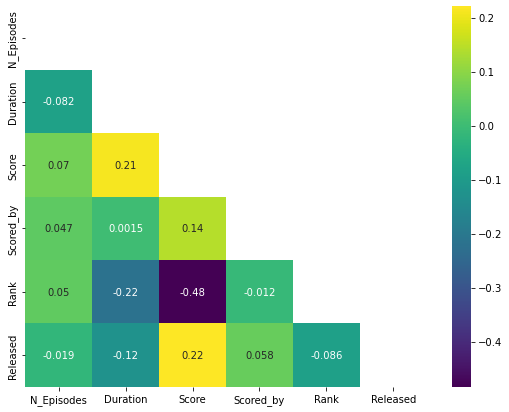

In [33]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = df_copy.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color, en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(corr,annot=True,cmap='viridis',mask = mask)

## Saving cleaned df using Pickle

In [34]:
# import pickle
# fichero = open("C:/Users/Christiandda/Desktop/dataset/"+"anime.pkl","wb")
# pickle.dump(df_copy,fichero)
# fichero.close()

## Opening cleaned df using Pickle

In [6]:
import pickle
fichero = open("C:/Users/Christiandda/Desktop/dataset/"+"anime.pkl","rb")
df_copy = pickle.load(fichero)
fichero.close()

# Data and visual Analysis  

## One Dimensional-Analysis

### Numerical Columns

#### N_Episodes

75 % of the animes has 13 episodes. This is actually the standard number of episodes for an anime.

In [34]:
df_copy["N_Episodes"].describe()

count    24105.000000
mean        14.895623
std         49.937253
min          0.000000
25%          1.000000
50%          2.000000
75%         13.000000
max       3057.000000
Name: N_Episodes, dtype: float64

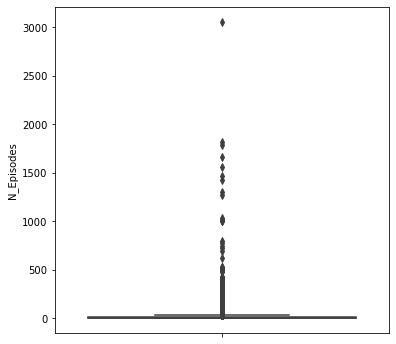

In [7]:
utils.box(df_copy,'N_Episodes') # Hacer una escala logaricmica  numpy loc de n_pisodios+1 

#### Duration

At first it is pretty hard to see using a regular histplot, for this reason we are going to use a logarithmic scale.

Now we can see that the distribution tells us that most of the animes has a duration between 5 and 25 minutes.

Another way is to not take into account duration higer than 150minutes because they are unusual

C:\Users\Christiandda\AppData\Local\Temp\ipykernel_13780\259969406.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df_copy , x = 'Duration' , kde = True, palette="light:m_r")


<AxesSubplot:xlabel='Duration', ylabel='Count'>

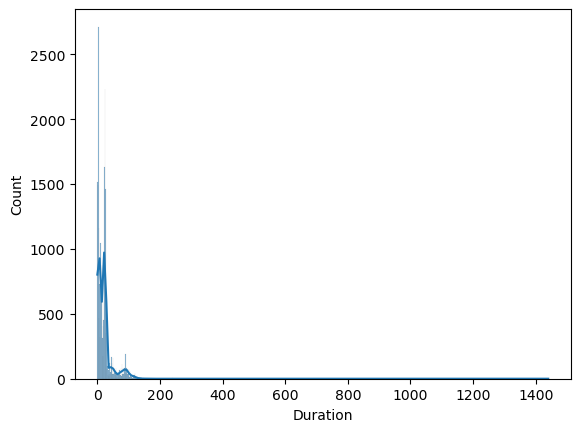

In [97]:
sns.histplot(data = df_copy , x = 'Duration' , kde = True, palette="light:m_r")

<AxesSubplot:xlabel='Duration', ylabel='Count'>

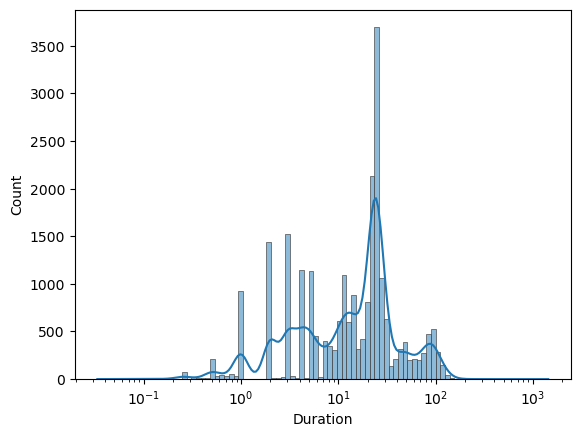

In [ ]:
sns.histplot(data = df_copy , x = 'Duration', kde = True, palette="light:m_r", log_scale=True, edgecolor=".3", linewidth=.5)

C:\Users\Christiandda\AppData\Local\Temp\ipykernel_13780\4228244815.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = until400 , x = 'Duration' , kde = True, palette="light:m_r")


<AxesSubplot:xlabel='Duration', ylabel='Count'>

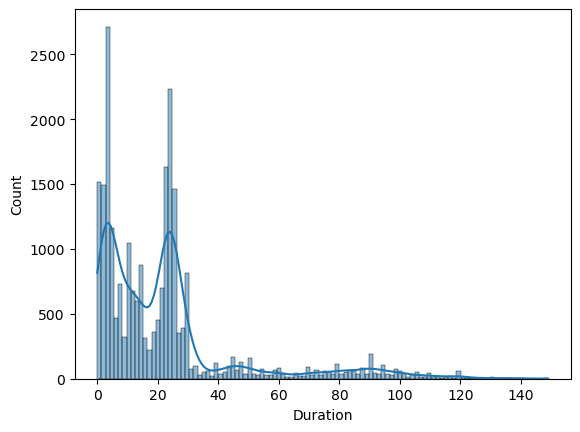

In [98]:
until400 = df_copy[df_copy["Duration"] < 150] 
sns.histplot(data = until400 , x = 'Duration' , kde = True, palette="light:m_r")

#### Score

Most of the animes are rated between 5 to 8

In [ ]:
print("There are",len(df_copy[(df_copy['Score'] >= 5) & (df_copy['Score'] <= 6)]),"animes between 5 and 6 points")
print("There are",len(df_copy[df_copy['Score'].between(6,7)]),"animes between 6 and 7 points")
print("There are",len(df_copy[df_copy['Score'].between(7,8)]),"animes between 7 and 8 points")
print("There are",len(df_copy[(df_copy['Score'] >= 8) & (df_copy['Score'] <= 9)]),"animes between 8 and 9 points")

There are 3938 animes between 5 and 6 points
There are 15301 animes between 6 and 7 points
There are 3602 animes between 7 and 8 points
There are 579 animes between 8 and 9 points


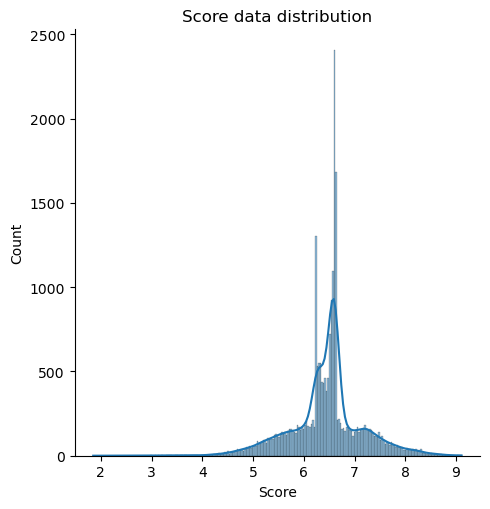

In [ ]:
sns.displot(data = df_copy , x = 'Score' , kde = True, height=5,aspect=1).set(title='Score data distribution')

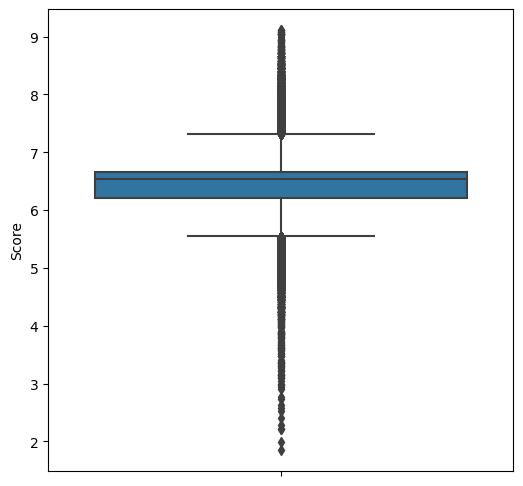

In [ ]:
utils.box(df_copy,'Score')

#### Rank

#### Released

We can see a serious increase the 80's. At that time, anime became mainstream in Japan, experiencing a boom in production with the rise in popularity of anime like Gundam, Macross, Dragon Ball, and genres such as real robot, space opera and cyberpunk.

We can appreciate a declive in releases during 2019 and 2020, this could be duo to the COVID-19 period.

Another possible factor is that during the last years in the anime industry, there are so many copy-and-paste anime. The only difference may be the relationship between characters, slight changes in the plot, and different characters and/or setting. The anime industry has definitely declined in quality and uniqueness throughout the years. However, there are still releasing some great gems that keep the industry still strong, lately examples: My Hero Academia, Attack On Titan, Tokyo Revengers, Jujutsu Kaisen and Kimetsu no Yaiba.

In [ ]:
df_copy['Released'].unique()

array([1998, 2001, 2002, 2004, 2005, 1999, 2003, 1995, 1997, 1996, 1988,
       1993, 2000, 1979, 1989, 1991, 1985, 1986, 1994, 1992, 1990, 1978,
       1973, 2006, 1987, 1984, 1982, 1977, 1983, 1980, 1976, 1968, 1981,
       2007, 1971, 1967, 1975, 1962, 1965, 1969, 1974, 1964, 2008, 1972,
       1970, 1966, 1963, 1945, 2009, 2012, 2021, 1933, 1929, 1943, 2010,
       1931, 1930, 1932, 1934, 1936, 1928, 1960, 1958, 2011, 1959, 1947,
       1917, 1935, 1938, 1939, 1941, 1942, 1948, 1950, 1957, 1961, 1918,
       1924, 1925, 1926, 1927, 1937, 1940, 1944, 1946, 1949, 1951, 1952,
       1953, 1954, 1955, 1956, 2016, 2013, 2019, 2018, 2014, 2015, 2017,
       2022, 2020, 2023, 2024, 1921])

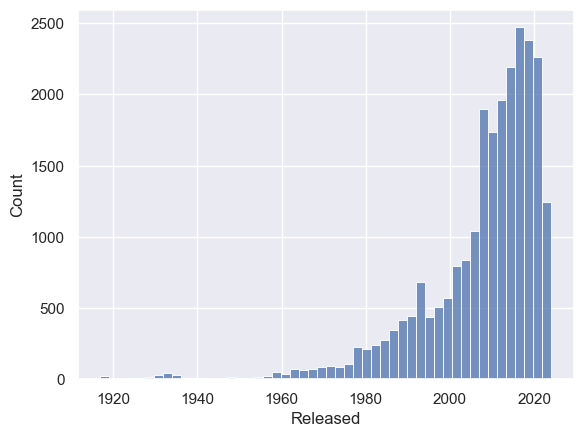

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=df_copy, x="Released", bins=50)
plt.show()

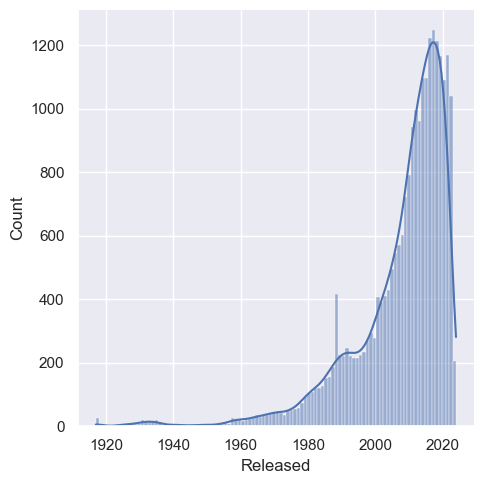

In [ ]:
sns.displot(data = df_copy , x = 'Released' , kde = True) #anderson darling

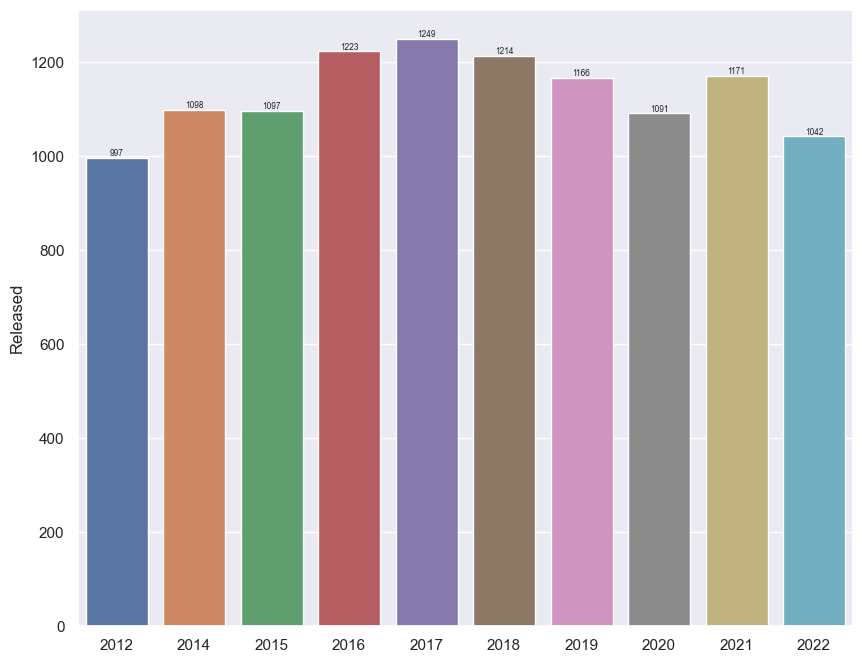

In [ ]:
utils.barplot_top10(df_copy['Released'])

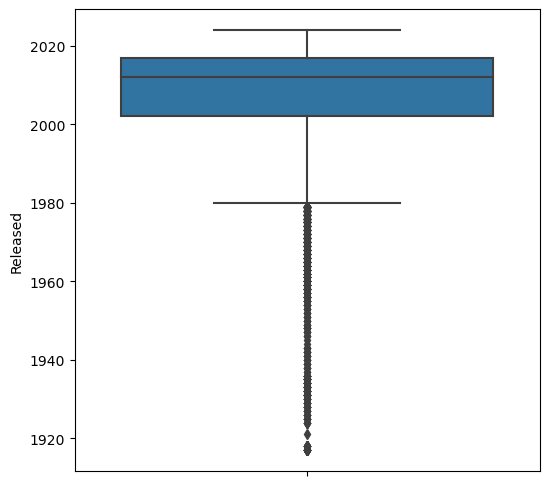

In [ ]:
utils.box(df_copy,'Released')

Right now Bleach: Sennen Kessen-hen (Released in 2022) is in the first position with 9.11 and 80321 votes. Fullmetal Alchemist: Brotherhood (released in 2009) is in second position with 1933742 votes. However, since Fullmetal Alchemist: Brotherhood has more votes, I would consider it as number 1

In [ ]:
df_copy.sort_values(by = 'Rank', ascending = True).head(10)

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
16645,Bleach: Sennen Kessen-hen,TV,Manga,13,24.0,R - 17+ (violence & profanity),9.11,80321,1,"Action,Adventure,Fantasy",Unknown,2022,Pierrot,"TV Tokyo,Aniplex,Dentsu,Shueisha"
3961,Fullmetal Alchemist: Brotherhood,TV,Manga,64,24.0,R - 17+ (violence & profanity),9.11,1933742,2,"Action,Adventure,Drama,Fantasy",Military,2009,Bones,"Aniplex,Square Enix,Mainichi Broadcasting Syst..."
17635,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV,Manga,13,23.0,PG-13 - Teens 13 or older,9.09,373142,3,"Comedy,Romance","Psychological,School",2022,A-1 Pictures,"Aniplex,Mainichi Broadcasting System,Magic Cap..."
5669,Steins;Gate,TV,Visual novel,24,24.0,PG-13 - Teens 13 or older,9.08,1286088,4,"Drama,Sci-Fi,Suspense","Psychological,Time Travel",2011,White Fox,"Frontier Works,Media Factory,Movic,AT-X,Kadoka..."
9883,Gintama°,TV,Manga,51,24.0,PG-13 - Teens 13 or older,9.07,227495,5,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2015,Bandai Namco Pictures,"TV Tokyo,Aniplex,Dentsu"
14879,Shingeki no Kyojin Season 3 Part 2,TV,Manga,10,23.0,R - 17+ (violence & profanity),9.06,1386387,6,"Action,Drama","Gore,Military,Survival",2019,Wit Studio,"Production I.G,Dentsu,Mainichi Broadcasting Sy..."
5991,Gintama',TV,Manga,51,24.0,PG-13 - Teens 13 or older,9.05,217364,7,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2011,Sunrise,"TV Tokyo,Aniplex,Dentsu,Trinity Sound,Miracle ..."
15542,Gintama: The Final,Movie,Manga,1,104.0,PG-13 - Teens 13 or older,9.05,56776,8,"Action,Comedy,Drama,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2021,Bandai Namco Pictures,"TV Tokyo,Warner Bros. Japan"
7242,Gintama': Enchousen,TV,Manga,13,24.0,PG-13 - Teens 13 or older,9.04,151944,9,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2012,Sunrise,"TV Tokyo,Aniplex,Dentsu,Shueisha,Miracle Bus"
6458,Hunter x Hunter (2011),TV,Manga,148,23.0,PG-13 - Teens 13 or older,9.04,1569486,10,"Action,Adventure,Fantasy",Unknown,2011,Madhouse,"VAP,Nippon Television Network,Shueisha"


### Categorical Columns

#### Dictribución de variables categóricas

#### Type

As we can see below, most of the anime are TV type (regular series).

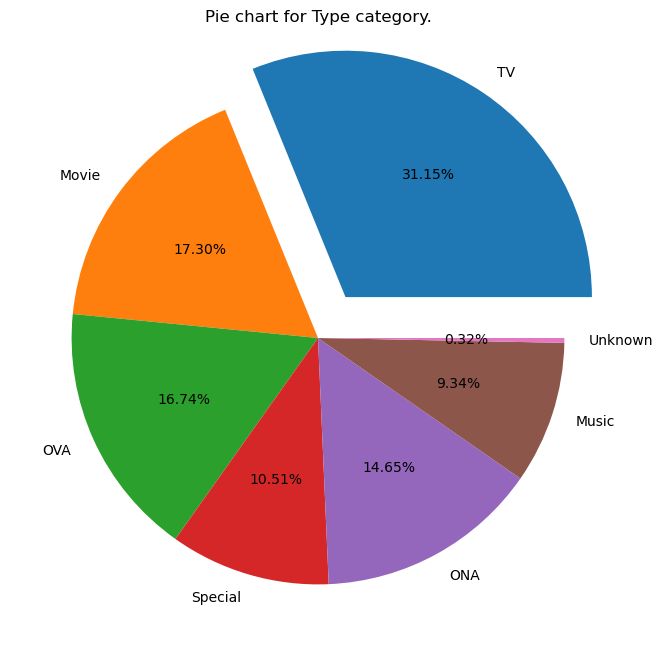

In [ ]:
utils.pieplot(df_copy["Type"],"Type")

#### Source

We can see that most of the anime comes from an original idea (where anime companies write up the plot and design the characters themselves). Manga and game are also a popular sources for animes. Of all the anime we have in the list, 24105 ,there are a total of 14681 that come from an original source, manga or game. This means that 60.90437666685334995 % of the anime belong to this group.

In [ ]:
source_top10 = df_copy['Source'].value_counts().head(10).index
nsource_top10 = df_copy['Source'].value_counts().head(10)

In [ ]:
nsource_top10

Original        8920
Manga           4570
Unknown         3899
Game            1191
Visual novel    1102
Other            964
Light novel      951
Novel            735
Web manga        383
Music            378
Name: Source, dtype: int64

In [ ]:
main_sources = df_copy[(df_copy['Source'].isin(['Original', 'Manga',"Game"]))]

<AxesSubplot:ylabel='Density'>

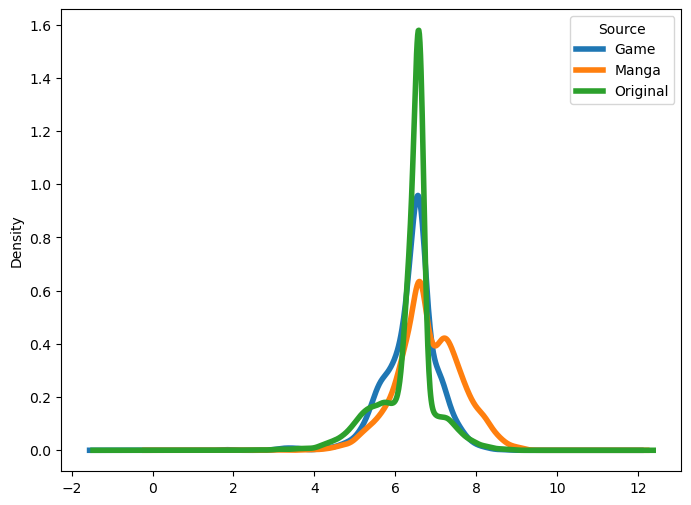

In [ ]:
# Converting to wide dataframe
data_wide = main_sources.pivot(columns = 'Source',
                     values = "Score")
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (8, 6),
                   linewidth = 4)

In [ ]:
print("Of all the anime we have in the list,",len(df_copy),",there are a total of",len(main_sources),"that come from an original source, manga or game. This means that",
((len(main_sources) * 100) / len(df_copy)),"% of the anime belong to this group.")

Of all the anime we have in the list, 24105 ,there are a total of 14681 that come from an original source, manga or game. This means that 60.904376685334995 % of the anime belong to this group.


#### Rating

Let's try to visualize the counts of Rating to see which kind of Rating is the most popular among all animes.

PG-13 - Teens 13 or older is the most popular.

Now lets compare it with more variables.

- With Type:

    - We can appreciate that most animes are for people 13 and older.

    - Except Rx - Hentai, G - All Ages and R+ - Mild Nudity , all have more TV type.


- With Source:
    - Rx - Hentai mostly comes from Visual novels. 
    
    - R - 17+ (violence & profanity), PG-13 - Teens 13 or older, R+ - Mild Nudity mostly comes from manga.
    
    - PG - Children  and G - All Ages mostly comes from an original idea.

In [ ]:
df_copy["Rating"].value_counts()

PG-13 - Teens 13 or older         8192
G - All Ages                      7230
PG - Children                     3989
Rx - Hentai                       1455
R - 17+ (violence & profanity)    1376
R+ - Mild Nudity                  1073
Unknown                            790
Name: Rating, dtype: int64

In [ ]:
df_copy["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

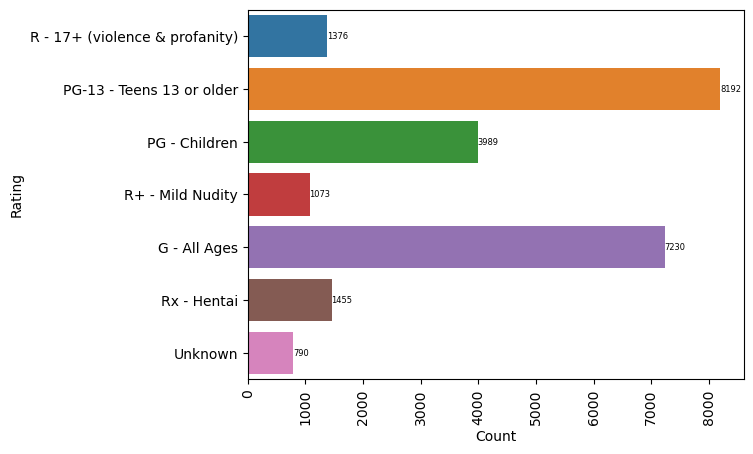

In [ ]:
utils.simple_barplot(df_copy["Rating"],"Rating")

#### Genre

We can appreciate that Comedy Genre is the most typical one.

Hacer ztest para demostrar hipotesis.!!!!!!!!!!!!!

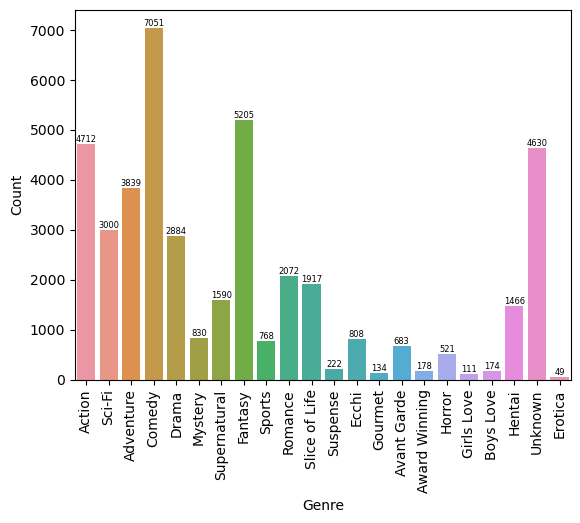

In [ ]:
# Genres: Top 10. sns.barplot
utils.complex_barplot(df_copy["Genre"],"Genre")

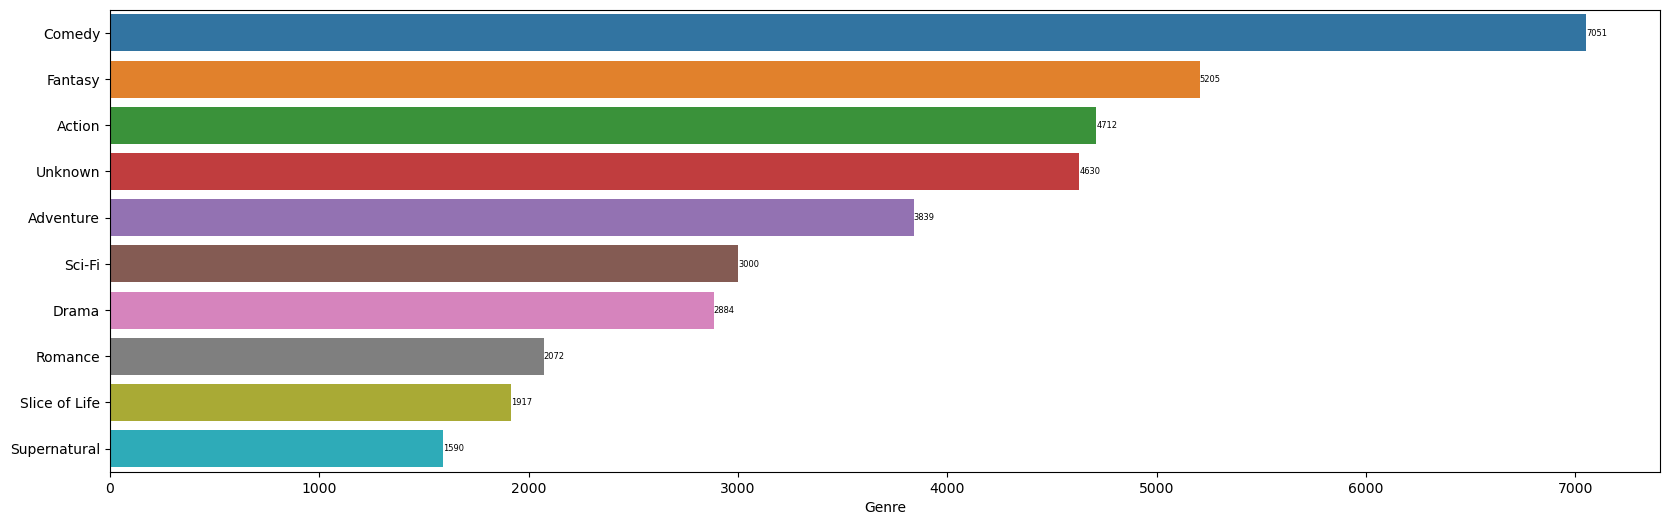

In [ ]:
# Genres: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Genre"])

#### Theme

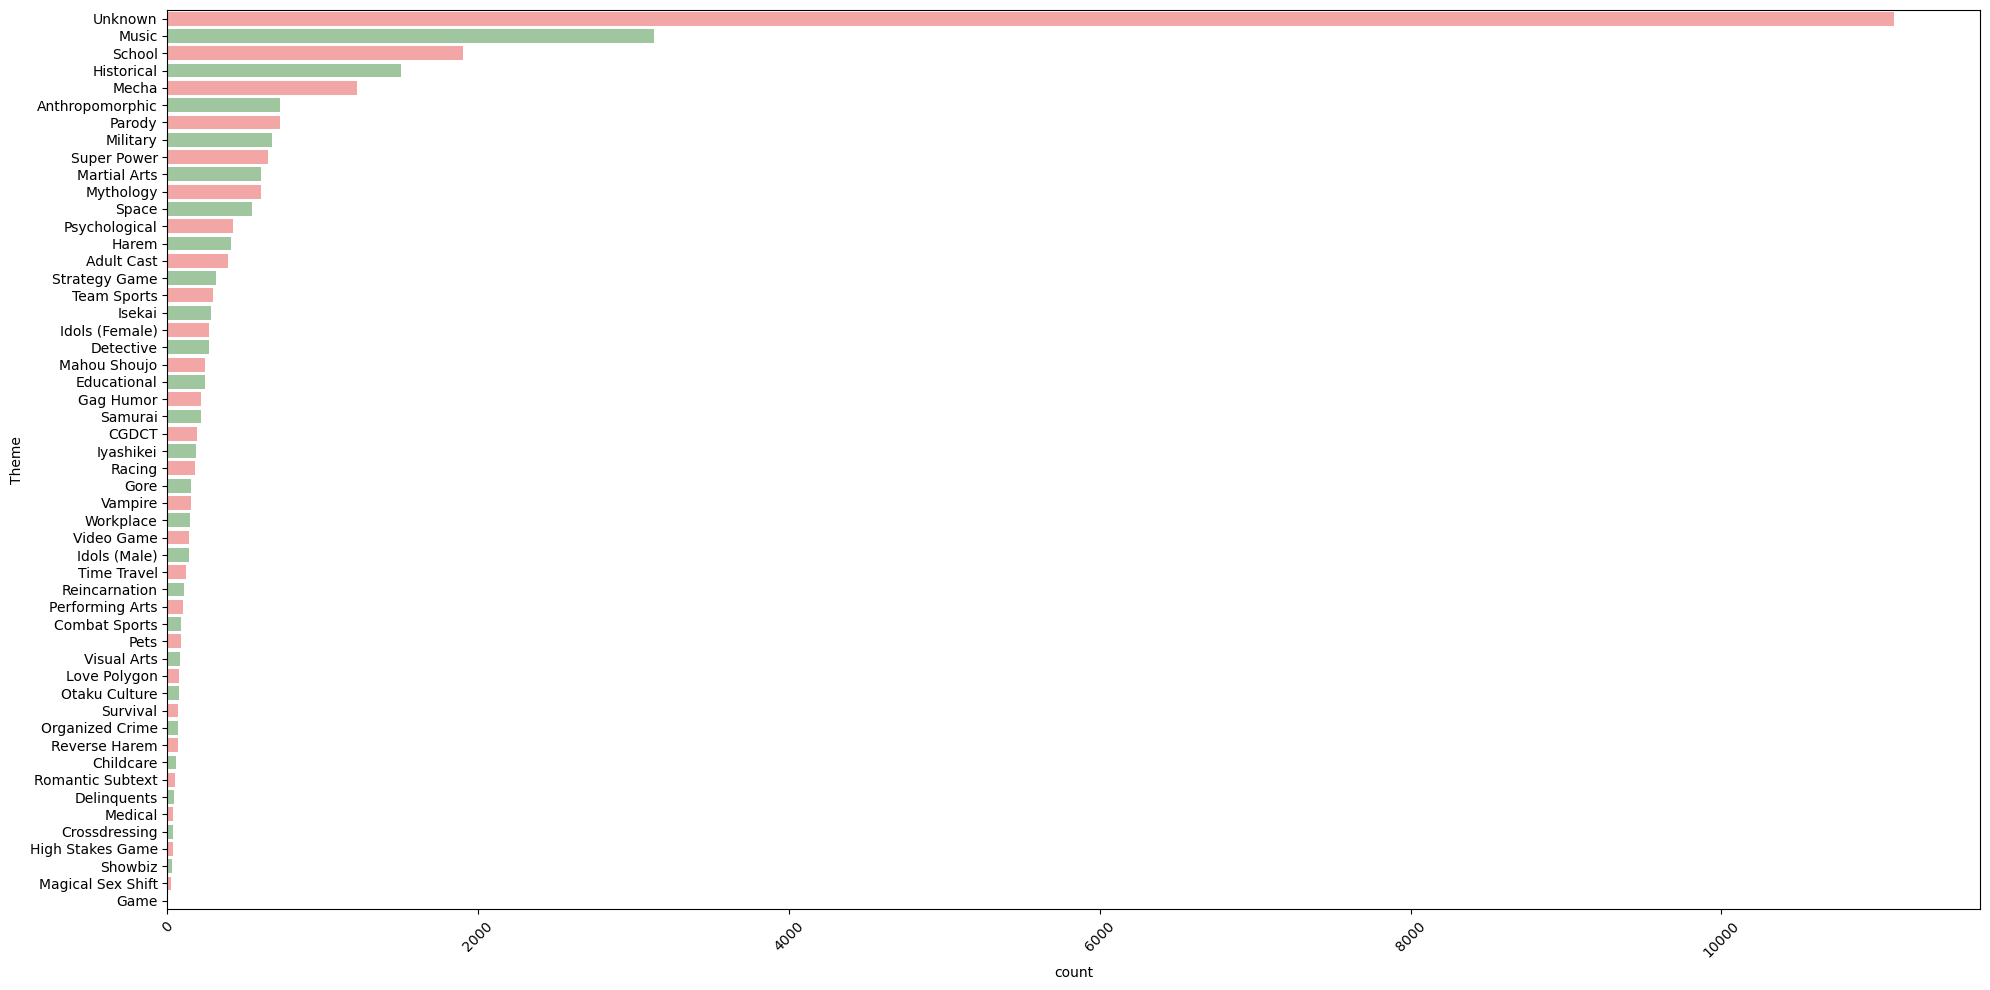

In [ ]:
utils.countplot(df_copy["Theme"],"Theme")

#### Producers

Top 10 producers with unknowns and Top 10 producers without unknowns

NHK, Nippon Hoso Kyokai (Japan Broadcasting Corporation), is the producer with the most anime in the world. However, it is a public entity. So Aniplex would be the first private company that most anime produces.

Really easy to understand why Aniplex is leading the chart. It has tittles like Fullmetal Alchemist: Brotherhood,Sword Art Online, Naruto, Naruto: Shippuuden, Kimetsu no Yaiba, Ao no Exorcist, Nanatsu no Taizai, Bleach, Soul Eater, etc With tittles like this under them, pretty normal that they lead.

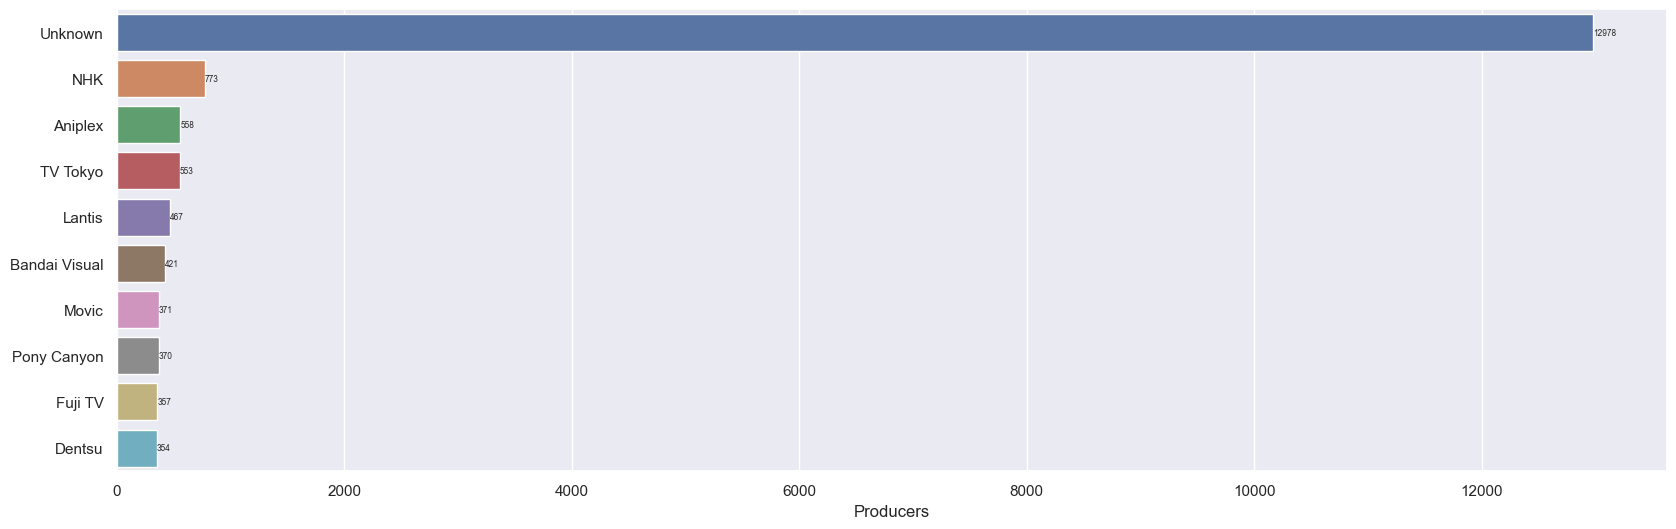

In [ ]:
utils.complex_barplot_top10(df_copy["Producers"])

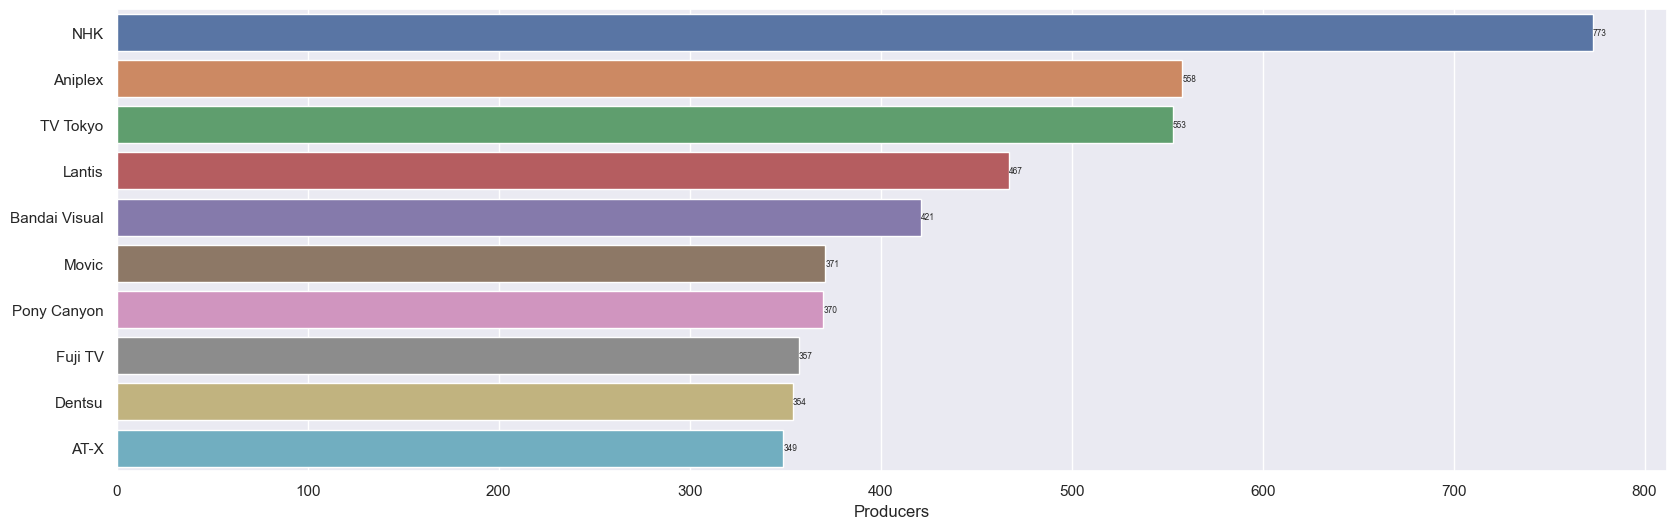

In [ ]:
df_copy2 = df_copy.copy()
no_unknown = df_copy2[df_copy2["Producers"] != "Unknown"]
utils.complex_barplot_top10(no_unknown["Producers"])

#### Studios

Top 10 Studios with unknowns and Top 10 Studios without unknowns

Toei Animation is the first private company with the most anime in the world. Not really surprising due to it is a studio nearly as old as anime itself, Toei Animation started as Japan Animated Films in 1948. Becoming a formidable powerhouse in the 1960s, the studio was responsible for classic, influential series such as Dragon Ball, Fist of the North Star, Slam Dunk, Mazinger Z, Galaxy Express 999, One Piece, and Sailor Moon.

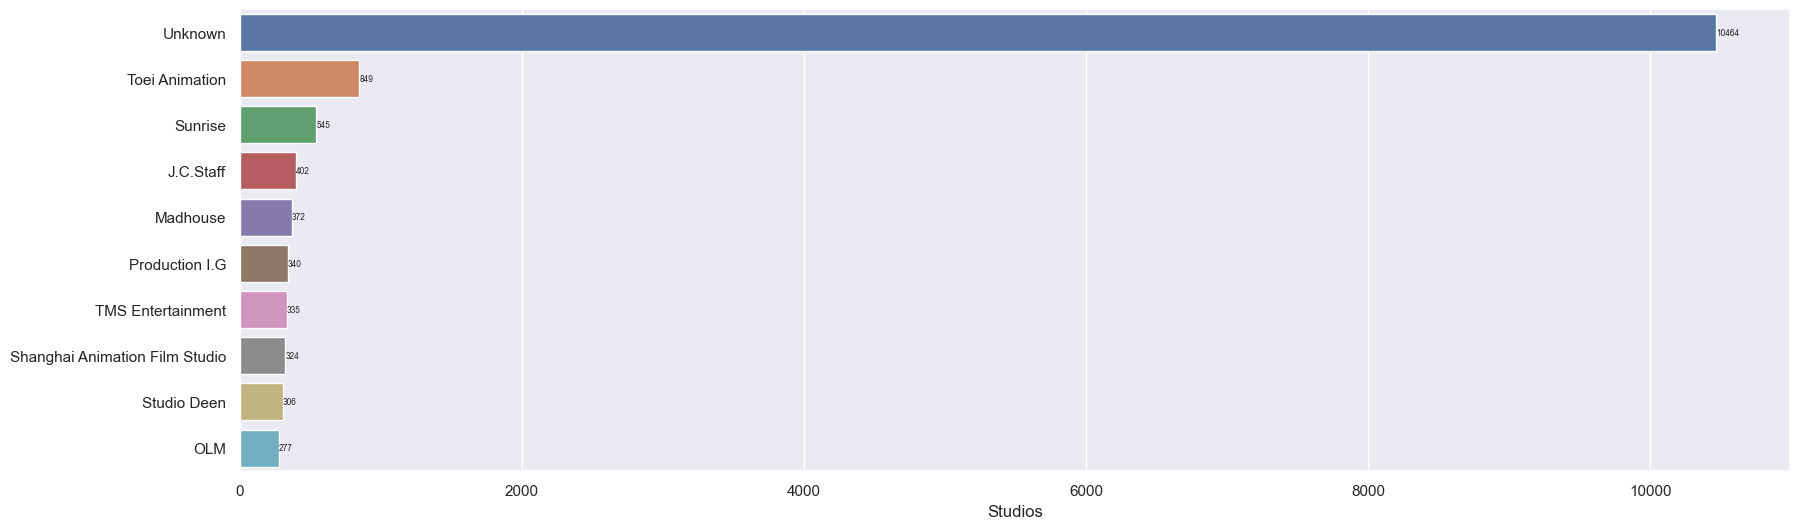

In [ ]:
# Studios: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Studios"])

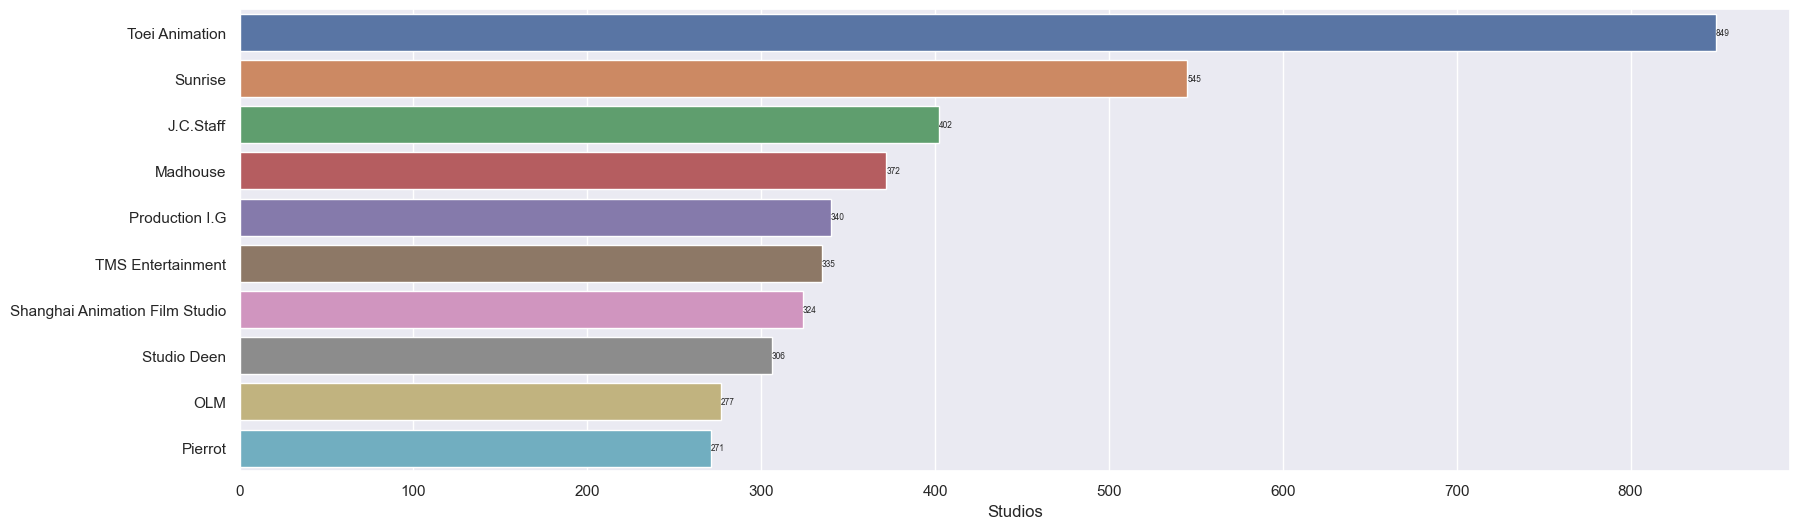

In [ ]:
no_unknown = df_copy2[df_copy2["Studios"] != "Unknown"]
utils.complex_barplot_top10(no_unknown["Studios"])

## Bi-Dimensional-Analysis

### Score and Type

We can observe that the types of anime focused on TV are the most valued by users. ONA has slight lower score than Movie or Special but with much scoreb_by. In that case Tv and ONA should be the ones to choose.

In [53]:
cont_table  = pd.crosstab(df_copy['Type'], df_copy['Scored_by'], margins=True)
cont_table

Scored_by,-1581878,-1556639,-1506609,-1408351,-1400265,-1353372,-1150269,-1144708,-1133858,-1114474,...,4093166,4098535,4107924,4112705,4118873,4122420,4125905,4127786,4128912,All
Type,,,,,,,,,,,,,,,,,,,,,
Movie,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,4169
Music,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2252
ONA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,3531
OVA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4034
Special,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2534
TV,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,7509
Unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,24105


In [28]:
X2, p_value, degree_freedom, expected_values = stats.chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 88081.57693214816, P-Value: 0.9999999999999991


In [47]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [48]:
sync = df_copy['Scored_by']
asyncr = df_copy['Score']
check_normality(sync)
check_normality(asyncr)

NameError: name 'stats' is not defined

In [136]:
utils.top_10_multi(df_copy,'Type','Score',"Scored_by") 

,Type,Score,Scored_by
5,TV,6.715764,81008.838194
6,Unknown,6.584459,803.355263
0,Movie,6.429894,26601.995203
4,Special,6.420673,11423.490923
2,ONA,6.328962,47405.744831
3,OVA,6.265786,11871.371839
1,Music,6.182972,10721.315719


<AxesSubplot:xlabel='Type', ylabel='Score'>

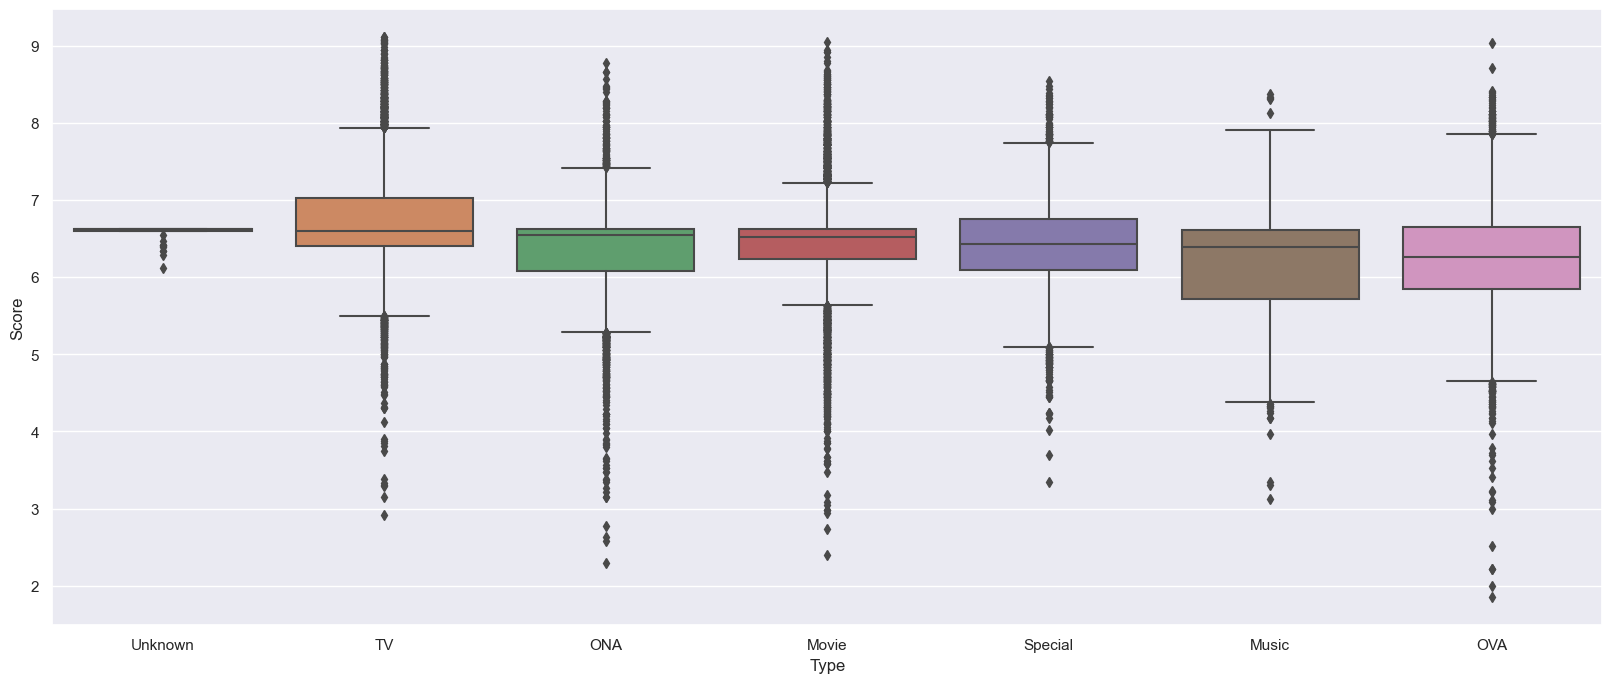

In [ ]:
utils.box_bidi(df_copy,'Type','Score')

### Score and Source

Anime that come from a Light Novel are the most highly rated. But manda is almost as Light Novel

In [35]:
until_2022 = df_copy[df_copy["Released"] < 2023]
utils.top_10_multi(until_2022,'Source','Score',"Scored_by") 

,Source,Score,Scored_by
4,Light novel,6.930000,28241.0
5,Manga,6.740000,5652.0
16,Web novel,6.616306,273.0
15,Web manga,6.611454,5136.5
8,Novel,6.608637,1598.0
6,Mixed media,6.570713,2083.0
0,4-koma manga,6.568373,6197.0
9,Original,6.532001,1082.0
1,Book,6.524610,2055.0
3,Game,6.510000,1735.0


In [36]:
utils.top_10_multi(df_copy,'Source','Score',"Scored_by") 

,Source,Score,Scored_by
4,Light novel,6.870000,25010.0
5,Manga,6.720000,5488.5
16,Web novel,6.616334,246.0
15,Web manga,6.612601,4811.0
8,Novel,6.608612,1598.0
0,4-koma manga,6.588360,5951.0
6,Mixed media,6.570860,2039.0
9,Original,6.532777,1080.5
1,Book,6.524908,2068.0
3,Game,6.512886,1710.0


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

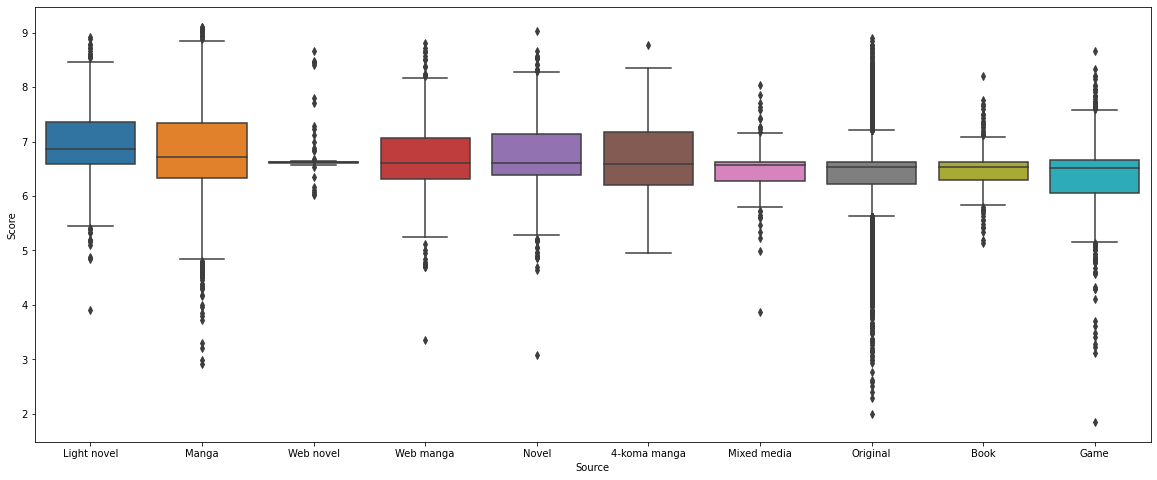

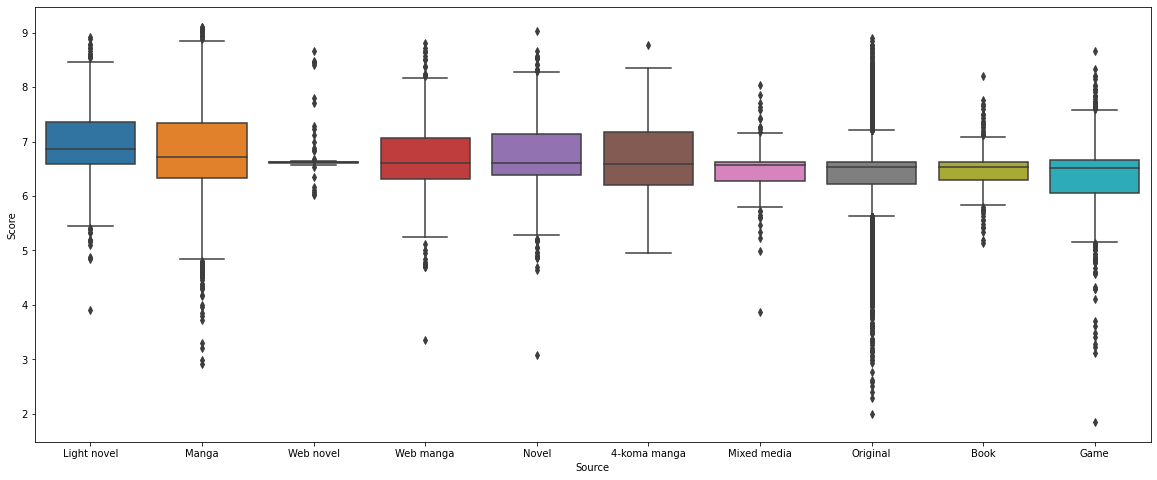

In [38]:
utils.box_bidi(df_copy,'Source','Score')
utils.box_bidi(df_copy,'Source','Score').savefig('Score_Source_Boxplot.pdf')

### Score and Number of Episodes


A Spearman rank correlation is considered as very weak (0 to 0.19)

A Spearman test was performed to investigate the relationship between Score and N_Episodes
Results of the test showed there was a positive, weak correlation between the two variables

Test whether Score and Duration of the episodes have a monotonic relationship.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Interpretation

- H0: there is a dependency between the samples.
- H1: the two samples are independent.

P-Value is 0, it indicates that there is no association between the two variables. In that case we reject the null hyphotesis. We cannot reject the alternative hyphotesis The two samples are independent

I can say that as the number of episodes increases, it does not mean that it will have a higher value. So the number of episodes does not influence. Or it does not mean by having many chapters , it will have better valuation.

Seems that the higher concentration of highger scores are between 12 and 25 episodes

In [132]:
# Spearman's Rank Correlation Test
# Revisamos la correlacion
df_copy['N_Episodes'].corr(df_copy['Score'] , method = 'spearman')

0.19521856752418962

In [133]:
# Pearson's dependency test
from scipy.stats import pearsonr
data1 = df_copy['N_Episodes']
data2 = df_copy['Score']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.070, p=0.000
Probably dependent


<AxesSubplot:xlabel='N_Episodes', ylabel='Score'>

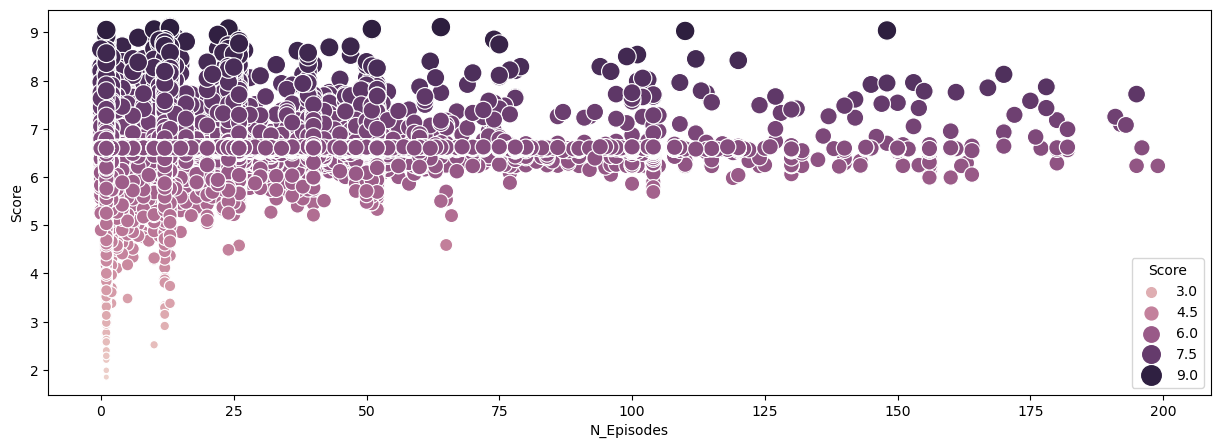

In [133]:
plt.figure(figsize=(15,5))
until2000 = df_copy[df_copy["N_Episodes"] < 200] #there are a couple of outliers, it is better to do not take them into account
sns.scatterplot(data = until2000 , x = 'N_Episodes' , y= "Score" , hue = "Score" , size = "Score" , sizes = (20,200))

### Score and Duration of the episodes

Spearman rank correlation is considered as weak  (0.20 to 0.39)

A Spearman test was performed to investigate the relationship between Score and Duration of the episodes
Results of the test showed there was a positive, weak correlation between the two variables

Test whether Score and Duration of the episodes have a monotonic relationship.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Interpretation

- H0: there is a dependency between the samples.
- H1: the two samples are independent.

P-Value is 0, it indicates that there is no association between the two variables. In that case we reject the null hyphotesis. We cannot reject the alternative hyphotesis The two samples are independent

In [51]:
# Spearman's Rank Correlation Test
# Revisamos la correlacion
df_copy['Duration'].corr(df_copy['Score'], method = 'spearman')

0.22198404630151367

In [43]:
# Spearman' dependency test
from scipy.stats import spearmanr
data1 = df_copy['Score']
data2 = df_copy['Duration']
stat, p = spearmanr(data1, data2)
print('stat=%.33f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.221984046301513665566673694229394, p=0.000
Probably dependent


<AxesSubplot:xlabel='Duration', ylabel='Score'>

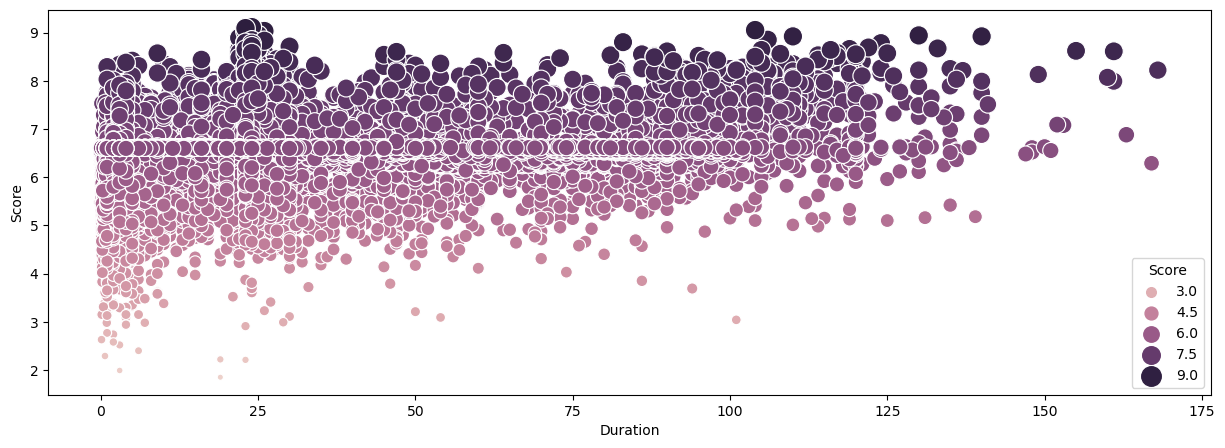

In [130]:
plt.figure(figsize=(15,5))
until400 = df_copy[df_copy["Duration"] < 200] #there are a couple of outliers, it is better to do not taking them into account
sns.scatterplot(data = until400 , x = 'Duration' , y= "Score" , hue = "Score" , size = "Score" , sizes = (20,200))

### Score and Rating

We can see that animes for viewers over 17 years old (R - 17+ (violence & profanity)) are the most highly valued in Score 6.8 with 88802 votes, however,PG-13 - Teens 13 or older with 6.6 score and 37739 of votes, then PG - Children get the higher number of votes (91519) with 6.49 score.

Doing some research we found some titles for each category:

R - 17+ (violence & profanity)
- Goblin Slayer
- Berserk
- Elfen Lied
- Hellsing 

PG-13 - Teens 13 or older
- My Hero Academia
- Sword Art Online The Movie
- Fullmetal Alchemist the Movie
- One Piece Film
- Naruto

PG - Children
- Spirited Away
- Pom Poko
- Avatar
- Howl's Moving Castle

Also taking into account the type of anime like Tv series, movie or ova, we can see that PG-13 - Teens 13 or older has more releases in the three of them (Tv series, movie, ova).

If we go for Adult audition, for sure we need R - 17+ (violence & profanity) but if we prefer people under 15 years old better PG-13 - Teens 13 or older and PG - Children. However many adults still watch PG-13 - Teens 13 or older with series like Bleach, Naruto, One Piece, Boku no Hero, etc.

It could be a good Idea to go for first for PG-13 - Teens 13 or older, and after analyze the results, go to R - 17+ (violence & profanity) or PG - Children

In [120]:
df_rating = df_copy.groupby(["Rating", "Type"]).size().reset_index(name="Times")
df_rating = df_rating[df_rating["Type"] == "TV"]
df_rating

,Rating,Type,Times
5,G - All Ages,TV,1341
12,PG - Children,TV,2435
19,PG-13 - Teens 13 or older,TV,2690
26,R - 17+ (violence & profanity),TV,549
33,R+ - Mild Nudity,TV,261
44,Unknown,TV,233


In [102]:
#score and Scored_by with median
utils.top_10_multi(df_copy,'Rating','Score',"Scored_by")             

,Rating,Score,Scored_by
3,R - 17+ (violence & profanity),6.882970,88802.781977
2,PG-13 - Teens 13 or older,6.683179,37739.061279
1,PG - Children,6.495474,91519.103785
6,Unknown,6.463277,4773.122785
4,R+ - Mild Nudity,6.265436,29014.529357
0,G - All Ages,6.185382,20956.564315
5,Rx - Hentai,6.098950,3292.389691


<AxesSubplot:xlabel='Rating', ylabel='Score'>

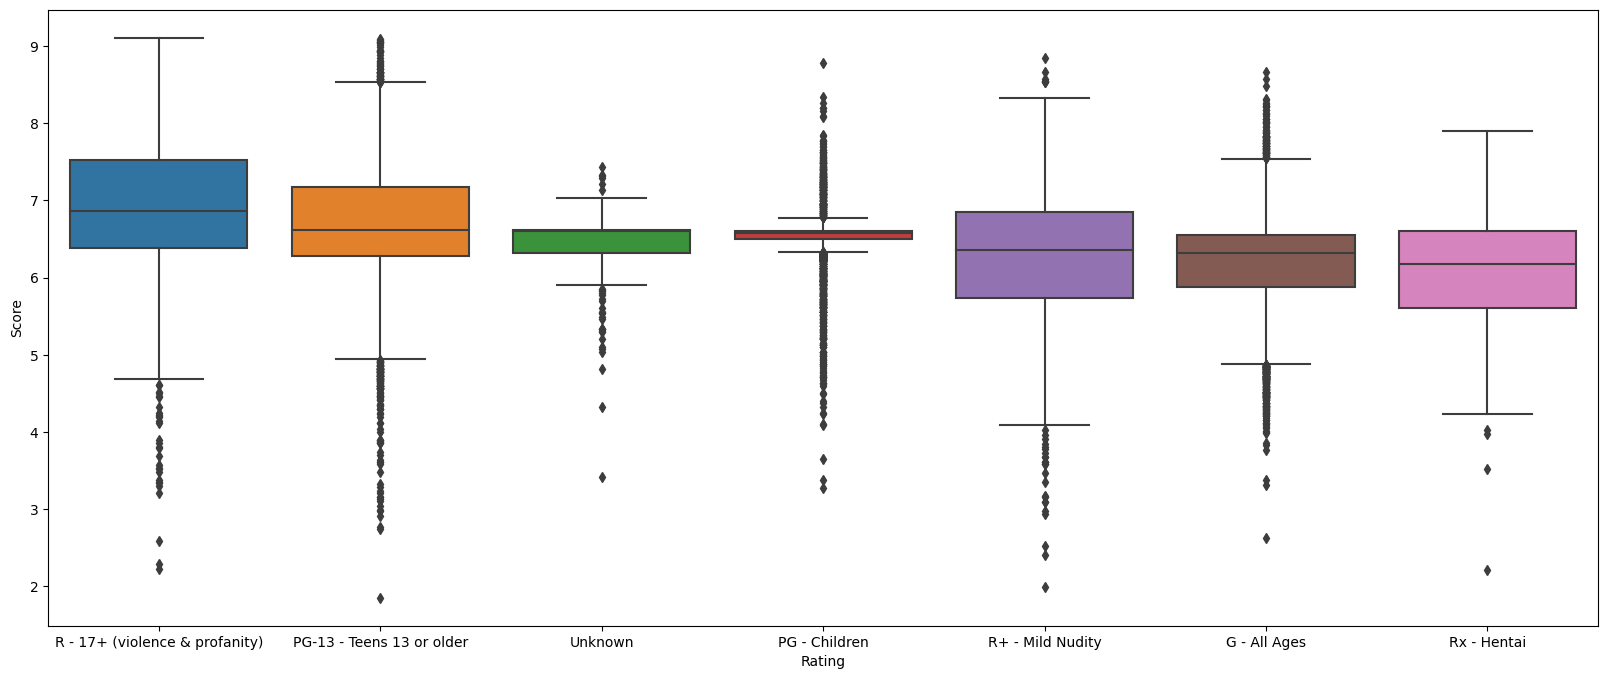

In [103]:
utils.box_bidi(df_copy,'Rating','Score')

### Score and Genre

We can see that Romance, Drama and Supernatural get the best Score using the median. However, taken into account the number of votes, we can see that Supernatural, Fantasy and Romance has more votes than the rest.

The avegare score between Fantasy and Romance does not change that much, from 6.5 to 6.7. Taking that into account I would rather create animation with the genre of Supernatural, Fantasy and Romance

Something to also have into account is that we hace many Unknown Genres, this could be for 2 reasons:
- A genre that does not fall into any category.
- Missing value that should need farther investigation to be found.

In [121]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Genre_Split'] = df_anime['Genre'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the producers columns with their score
df_copy_aux['Genre'] = pd.Series([x for _list in df_anime['Genre_Split'] for x in _list]) # split the information by comma creating one column for each item
df_copy_aux['Score'] = utils.series_extract(df_anime,'Genre_Split', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Genre_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
df_copy_aux.head()

,Genre,Score,Scored_by
0,Action,8.75,873436
1,Sci-Fi,8.75,873436
2,Action,8.38,199329
3,Sci-Fi,8.38,199329
4,Action,8.22,339491


In [122]:
top10 = df_copy_aux[df_copy_aux['Genre'].isin(df_anime['Genre'].str.split(',').explode().value_counts()[1:11].index)] # find the top 10
top = utils.top_10_multi(top10,'Genre','Score',"Scored_by")  #Find the topw 10 using mediam
top

,Genre,Score,Scored_by
5,Romance,6.705000,8421.0
8,Supernatural,6.627973,6651.0
2,Drama,6.624222,4400.5
0,Action,6.619729,3837.0
3,Fantasy,6.589651,2910.0
1,Adventure,6.570000,2707.0
6,Sci-Fi,6.560000,3124.0
9,Unknown,6.519407,548.0
7,Slice of Life,6.509392,2643.0
4,Hentai,6.170000,1809.5


In [124]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Genre').apply(lambda x: np.std(x, ddof=1) / np.mean(x))

c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return

,Score,Scored_by
Genre,,
Action,0.117681,3.473258
Adventure,0.098637,4.316449
Drama,0.112644,3.927941
Fantasy,0.095980,4.381558
Hentai,0.113435,2.777146
Romance,0.108693,2.381233
Sci-Fi,0.115004,3.936526
Slice of Life,0.110705,4.928605
Supernatural,0.120692,3.155532


<AxesSubplot:xlabel='Genre', ylabel='Score'>

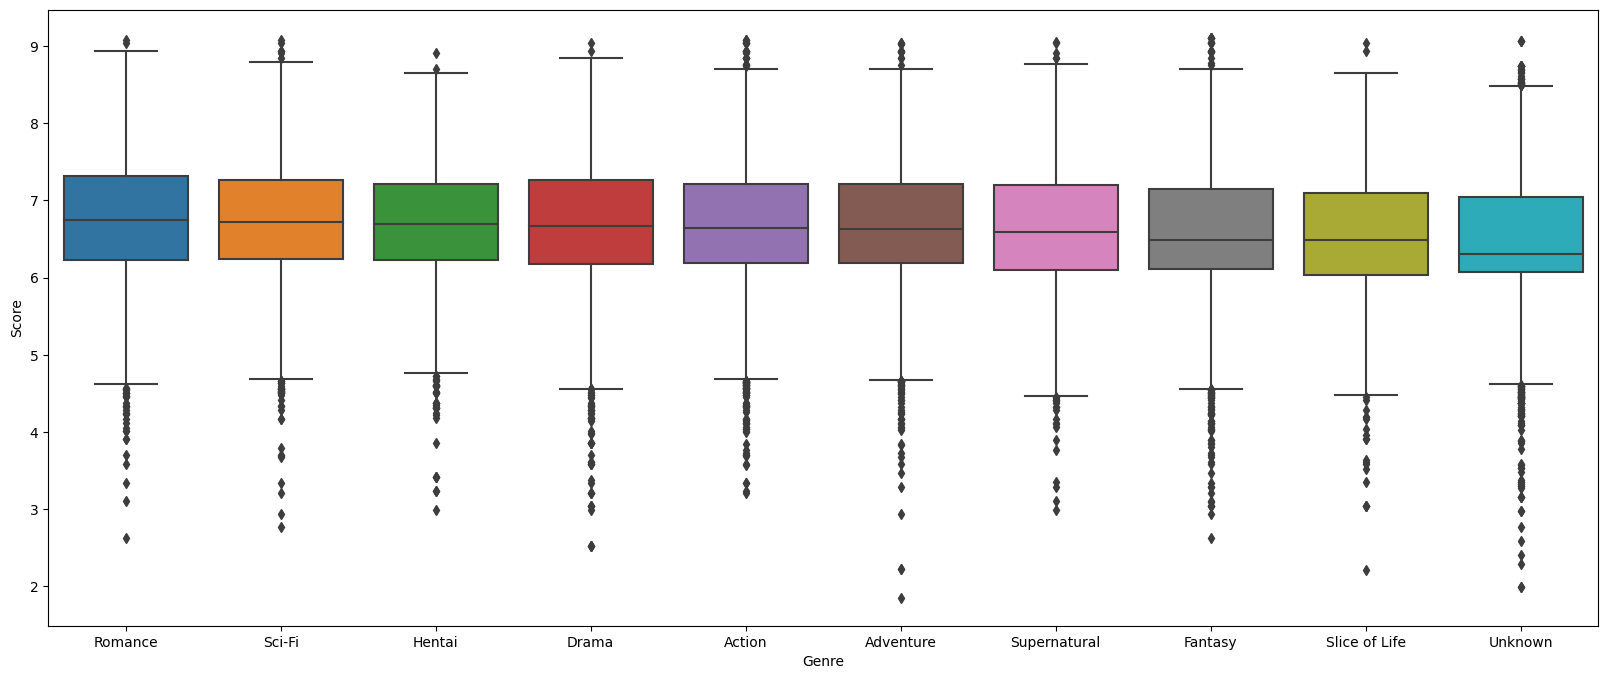

In [35]:
utils.box_bidi(top10,'Genre','Score')

### Score and Theme

We can see that School, Military and Mythology get the best Score using the median. However, taken into account the number of votes, we can see that Anthropomorphic, School and Super Power has more votes than the rest.

The avegare score between Anthropomorphic and School does not change that much, from 6.8 to 6.6. Taking that into account I would rather create animation with the theme of Anthropomorphic, School and Super Power.

In [126]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Theme_Split'] = df_anime['Theme'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the producers columns with their score
df_copy_aux['Theme'] = pd.Series([x for _list in df_anime['Theme_Split'] for x in _list]) # split the information by comma creating one column for each item
df_copy_aux['Score'] = utils.series_extract(df_anime,'Theme_Split', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Theme_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
df_copy_aux.head()

,Theme,Score,Scored_by
0,Adult Cast,8.75,873436
1,Space,8.75,873436
2,Adult Cast,8.38,199329
3,Space,8.38,199329
4,Adult Cast,8.22,339491


In [127]:
top10 = df_copy_aux[df_copy_aux['Theme'].isin(df_anime['Theme'].str.split(',').explode().value_counts()[1:11].index)] # find the top 10
top = utils.top_10_multi(top10,'Theme','Score',"Scored_by") 
top

,Theme,Score,Scored_by
8,School,6.720000,11445.0
4,Military,6.690000,5151.0
6,Mythology,6.621022,3789.0
2,Martial Arts,6.617351,1734.0
9,Super Power,6.610000,7294.0
0,Anthropomorphic,6.592530,9963.5
1,Historical,6.559116,1701.0
3,Mecha,6.539031,2380.0
5,Music,6.400000,407.0
7,Parody,6.355508,1900.0


In [129]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Theme').apply(lambda x: np.std(x, ddof=1) / np.mean(x))

c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return

,Score,Scored_by
Theme,,
Anthropomorphic,0.048577,3.772931
Historical,0.108325,4.496769
Martial Arts,0.100327,5.791825
Mecha,0.109350,4.477915
Military,0.125515,4.001174
Music,0.115582,5.351533
Mythology,0.129173,3.371834
Parody,0.128955,4.069218
School,0.109464,2.408797


<AxesSubplot:xlabel='Theme', ylabel='Score'>

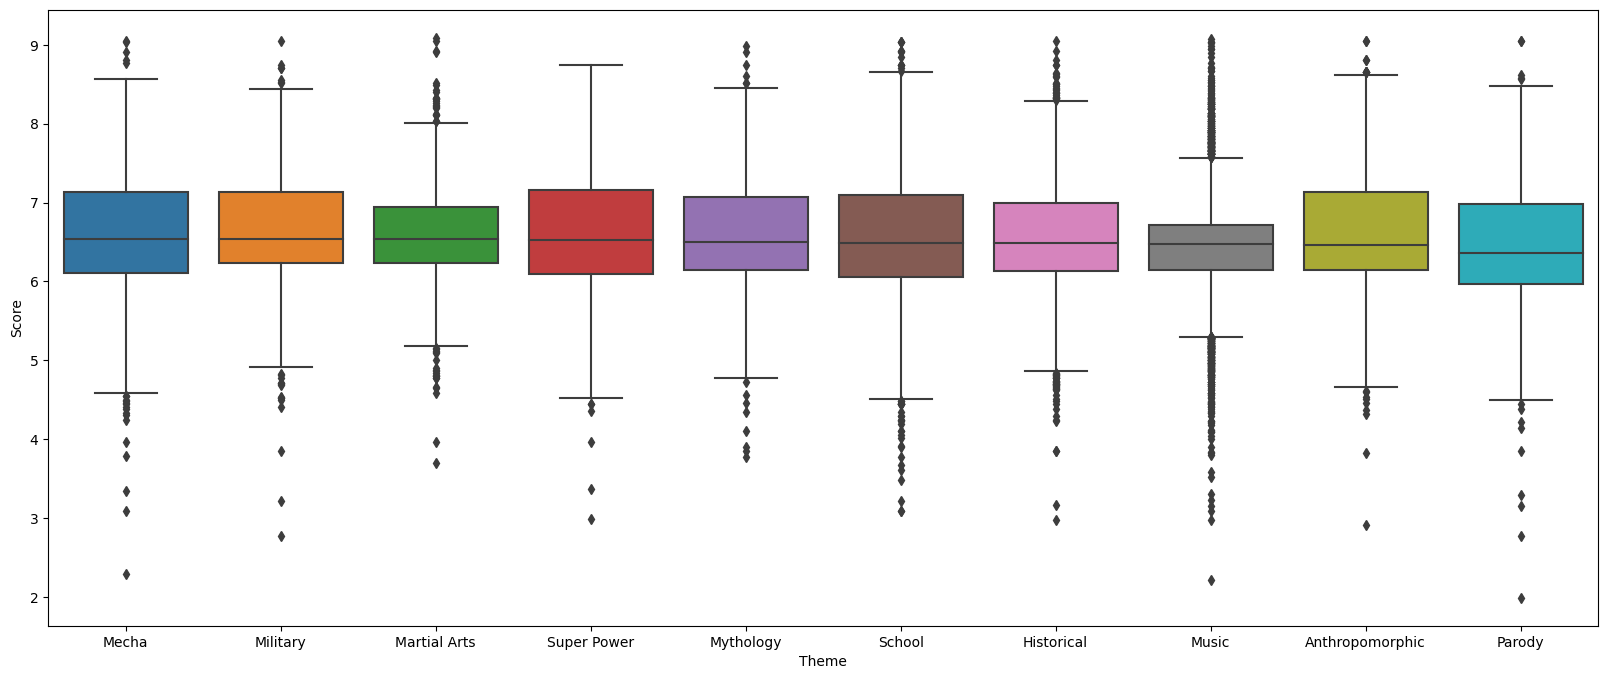

In [44]:
utils.box_bidi(top10,'Theme','Score')

### Score and Producers

We can see that Dentsu, Aniplex and Movic get the best Score using the median and also the best scored by using the median

Taking that into account I would hired Dentsu, Aniplex and Movic as producer for animation

In [125]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Producers_Split'] = df_anime['Producers'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the producers columns with their score
df_copy_aux['Producers'] = pd.Series([x for _list in df_anime['Producers_Split'] for x in _list]) # split the information by comma creating one column for each item
df_copy_aux['Score'] = utils.series_extract(df_anime,'Producers_Split', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Producers_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
df_copy_aux.head()

,Producers,Score,Scored_by
0,Bandai Visual,8.75,873436
1,Sunrise,8.38,199329
2,Bandai Visual,8.38,199329
3,Victor Entertainment,8.22,339491
4,TV Tokyo,7.25,42135


In [119]:
top10 = df_copy_aux[df_copy_aux['Producers'].isin(df_anime['Producers'].str.split(',').explode().value_counts()[1:11].index)] # find the top 10
top = utils.top_10_multi(top10,'Producers','Score',"Scored_by") #Find the topw 10 using mediam
top

,Producers,Score,Scored_by
3,Dentsu,7.405000,46539.5
1,Aniplex,7.320000,48991.0
6,Movic,7.200000,46803.0
0,AT-X,7.010000,68613.0
5,Lantis,6.980000,24281.0
4,Fuji TV,6.970000,12775.0
9,TV Tokyo,6.970000,12291.0
2,Bandai Visual,6.940000,8953.0
8,Pony Canyon,6.830000,22179.5
7,NHK,6.361149,644.0


In [120]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Producers').apply(lambda x: np.std(x, ddof=1) / np.mean(x))

c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return

,Score,Scored_by
Producers,,
AT-X,0.097547,1.448191
Aniplex,0.109184,1.780259
Bandai Visual,0.100312,3.504355
Dentsu,0.108631,1.804679
Fuji TV,0.126629,2.409855
Lantis,0.100449,2.135781
Movic,0.116390,1.713928
NHK,0.107136,6.234538
Pony Canyon,0.121859,2.675487


<AxesSubplot:xlabel='Producers', ylabel='Score'>

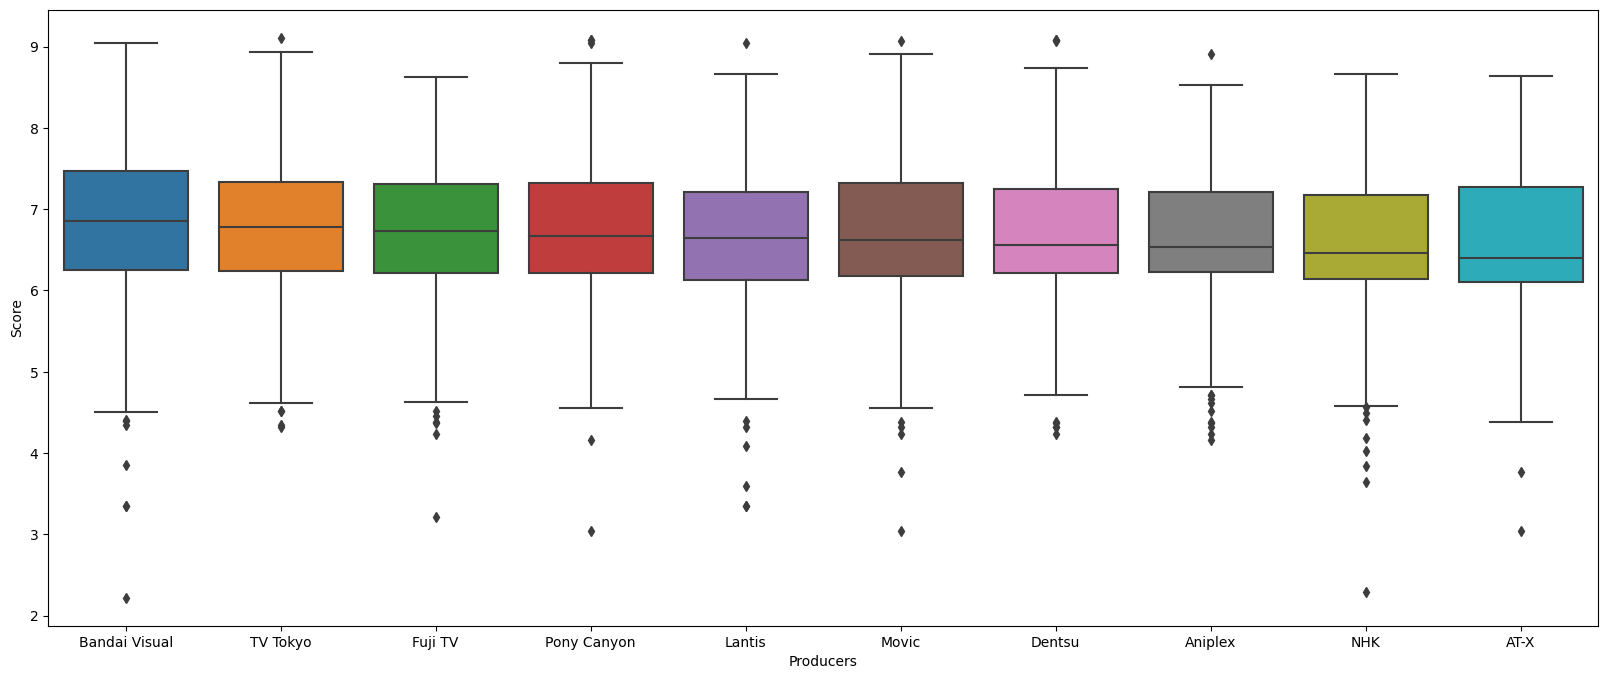

In [47]:
utils.box_bidi(top10,'Producers','Score')

### Score and Studios

We can see that Production I.G, Madhouse and Studio Deen get the best Score using the median. However, taken into account the number of votes using the median, we can see that Madhouse, Pierrot and J.C.Staff has more votes than the rest.

It is not the same having a 6.98 (Production I.G) point in average with 48581 median votes than having a 6.9 (Production I.G) with 73470 median votes.

Taking that into account I would rather hire Madhouse, Pierrot and J.C.Staff as studio for animation

In [63]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Studios_Split'] = df_anime['Studios'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the producers columns with their score
df_copy_aux['Studios'] = pd.Series([x for _list in df_anime['Studios_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Studios_Split', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Studios_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
df_copy_aux.head()

,Studios,Score,Scored_by
0,Sunrise,8.75,873436
1,Bones,8.38,199329
2,Madhouse,8.22,339491
3,Sunrise,7.25,42135
4,Toei Animation,6.95,6307


In [84]:
top10 = df_copy_aux[df_copy_aux['Studios'].isin(df_anime['Studios'].str.split(',').explode().value_counts()[1:11].index)] # find the top 10
top = utils.top_10_multi(top10,'Studios','Score',"Scored_by") #Find the topw 10 using mediam
top


,Studios,Score,Scored_by
4,Production I.G,7.100000,10162.0
6,Studio Deen,6.955000,8708.0
1,Madhouse,6.880000,6864.5
7,Sunrise,6.830000,2701.0
0,J.C.Staff,6.820000,10040.0
8,TMS Entertainment,6.790000,4312.0
3,Pierrot,6.760000,4560.0
5,Shanghai Animation Film Studio,6.526434,16709.0
2,OLM,6.520000,3882.0
9,Toei Animation,6.480000,1698.0


In [116]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Studios').apply(lambda x: np.std(x, ddof=1) / np.mean(x))

c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Christiandda\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return

,Score,Scored_by
Studios,,
J.C.Staff,0.118023,2.526729
Madhouse,0.121096,3.182238
OLM,0.079682,2.368025
Pierrot,0.117720,3.433065
Production I.G,0.124596,2.649430
Shanghai Animation Film Studio,0.014618,10.810847
Studio Deen,0.107735,2.578040
Sunrise,0.105539,4.007885
TMS Entertainment,0.107275,2.999706


<AxesSubplot:xlabel='Studios', ylabel='Score'>

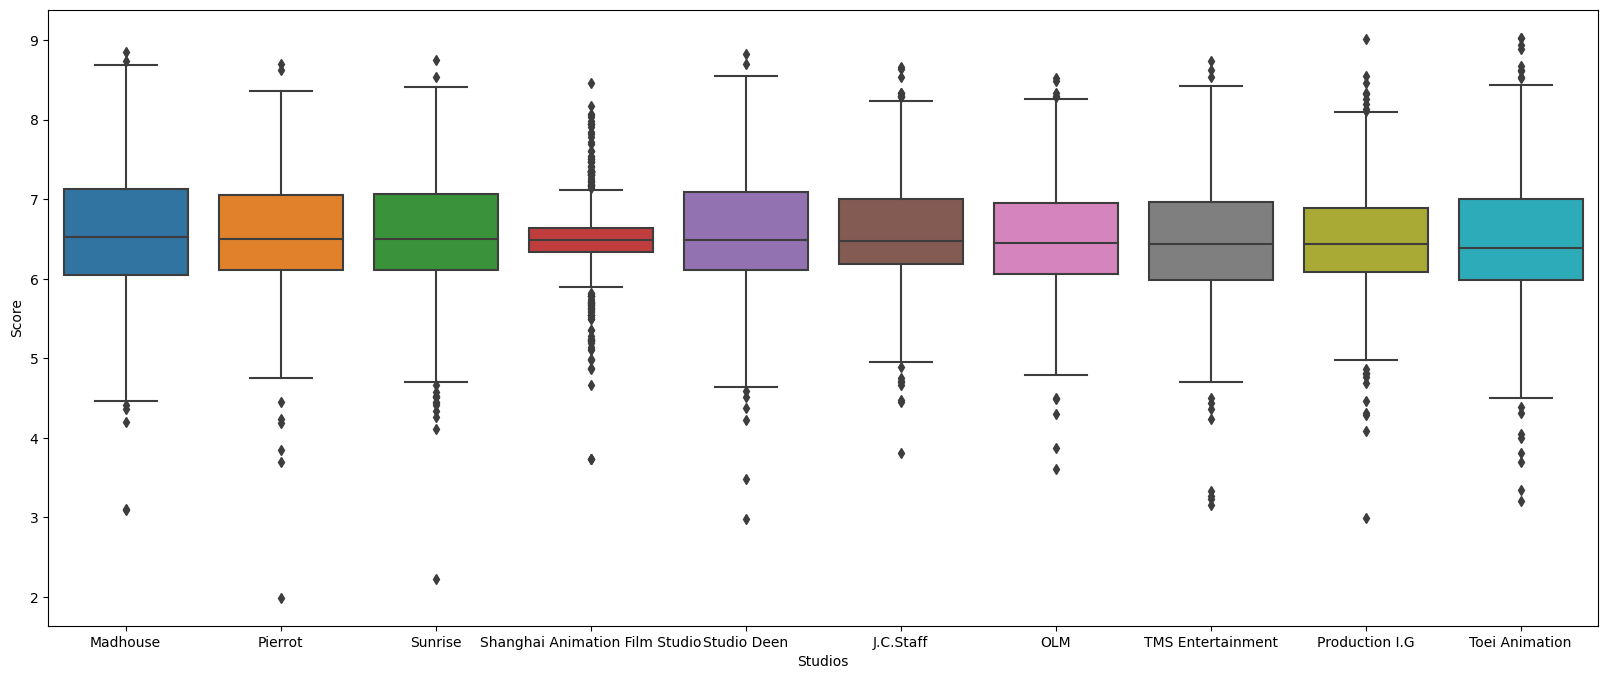

In [6]:
utils.box_bidi(top10,'Studios','Score')

# Conclusions

**From Categorical One Dimensional-Analysis**
- 75 % of the animes has 13 episodes.

- Most animes has a duration between 20 and 40 minutes

- Most of the animes are rated between 5 to 8

- Number 1 anime Fullmetal Alchemist: Brotherhood


**From Categorical One Dimensional-Analysis**
- Most of the anime are TV type (regular series)

- Most of the anime comes from an original idea (where anime companies write up the plot and design the characters themselves)

- PG-13 - Teens 13 or older is the most popular

- Comedy Genre is the most typical

- Music, School and history theme are the ones with more animes.

- 2016 was the year that the most anime were released . This was followed by 2017

- NHK, Nippon Hoso Kyokai (Japan Broadcasting Corporation), is the producer with the most anime in the world

- Toei Animation is the first private company with the most anime in the world


**From Bi-dimensional Analysis**
- **Best type of anime to produce:** TV amd ONA

- **Best source to create an anime:** Light Novel

- **Usual Number of episodes:** P-Value is 0, it indicates that there is no association between the two variables. In that case we reject the null hyphotesis. We cannot reject the alternative hyphotesis The two samples are independent. I can say that as the number of episodes increases, it does not mean that it will have a higher value. So the number of episodes does not influence. Or it does not mean by having many chapters , it will have better valuation.. Seems that the higher concentration of highger scores are between 12 and 25 episodes

- **Usual duration of an anime:** P-Value is 0, it indicates that there is no association between the two variables. In that case we reject the null hyphotesis. We cannot reject the alternative hyphotesis The two samples are independent

- **Best Rating to focus on produce:** PG-13 - Teens 13 or older

- **Best Genres to use in an anime:** Supernatural, Fantasy and Romance.

- **Best themes to use in an anime:** Anthropomorphic, School and Super Power.

- **Best producers to hire:** Dentsu, Aniplex and Movic.

- **Best studios to hire:** Madhouse, Pierrot and J.C.Staff.

# References 

- [MyAnimeList.net](https://myanimelist.net/)
- [from Data to Viz](https://www.data-to-viz.com/#connectedscatter)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Matplotlib Documentation](https://matplotlib.org/)
- [Data Visualization con pandas y seaborn](https://medium.com/ironhack/data-visualization-con-pandas-y-seaborn-1044906af34f)
- [The Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Stack Overflow](https://stackoverflow.com/)
- [codificandobits](https://www.codificandobits.com/blog/analisis-exploratorio-de-datos/)
- [Towards data science](https://towardsdatascience.com/beautifying-the-messy-plots-in-python-solving-common-issues-in-seaborn-7372e6479fb)
- [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)